# Анализ рекламных источников мобильной игры

**В проекте упоминаются компании (Facebook, Instagram), признанные экстремистскими, и запрещенные на территории РФ*

**Краткое описание проекта**

Данные содержат информацию о событиях, совершенных в мобильной игре. Игроки создают свою космическую программу и пытаются колонизировать галактику.

Планируется монетизация игры в виде показа рекламы на экране с выбором типа объекта для постройки на первом уровне. Для перехода на второй уровень игрок должен выполнить одн из двух условий:
- Победить первого врага
- Реализовать проект - разработать орбитальную сборку спутников.

**Постановка задачи**

Необходимо проанализировать поведение игроков в зависимости от источника перехода в мобильную игру и выявить наиболее и наименее перспективные источники.

## Изучение и предобработка данных

### Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
from scipy.stats import levene
import datetime as dt
from colorama import Fore
from colorama import Style

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_palette('Set2')
palette1=sns.color_palette('Set2', 1)
sns.set_style('dark')
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
costs, actions, source = (
    pd.read_csv('datasets/ad_costs.csv', parse_dates=['day'], dayfirst=True),
    pd.read_csv('datasets/game_actions.csv', parse_dates=['event_datetime'], dayfirst=True),
    pd.read_csv('datasets/user_source.csv')
)

In [5]:
def hello(df):
    
    drops = pd.DataFrame(
    {'кол-во пропусков': df.isna().sum(),
    '% пропусков': round((df.isna().sum() / len(df.index) *100))}
    )
    
    duplicates = pd.Series(
    {'кол-во дубликатов': df.duplicated().sum(),
    '% дубликатов': round(df.duplicated().sum() / len(df) * 100)}
    )
    
    print('Общая информация:')
    print()
    print(df.info())
    print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')
    print('Пропуски:')
    display(drops)
    print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')
    print('Явные дубликаты:')
    display(duplicates)
    print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')
    print('Шапка таблицы:')
    display(df.head())
    print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')
    print('Описательная статистика:')
    display(df.describe())

In [6]:
df_dict = {'actions' : actions,
    'costs' : costs,
    'source' : source
}

In [7]:
for df in df_dict.keys():
    print(Fore.RED + Style.BRIGHT + df + Style.RESET_ALL)
    print('____________________________________________________________________')
    hello(df_dict.get(df))

actions
____________________________________________________________________
Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB
None
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Пропуски:


,кол-во пропусков,% пропусков
event_datetime,0,0.00
event,0,0.00
building_type,7683,6.00
user_id,0,0.00
project_type,133774,99.00


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Явные дубликаты:


кол-во дубликатов    1
% дубликатов         0
dtype: int64

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Шапка таблицы:


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Описательная статистика:


,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-09 12:35:56,building,spaceport,bf542075-e3a2-4e79-82d8-3838e86d2a25,satellite_orbital_assembly
freq,4,127957,59325,22,1866
first,2020-05-04 00:00:01,NaN,NaN,NaN,NaN
last,2020-06-05 12:32:49,NaN,NaN,NaN,NaN


costs
____________________________________________________________________
Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes
None
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Пропуски:


,кол-во пропусков,% пропусков
source,0,0.00
day,0,0.00
cost,0,0.00


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Явные дубликаты:


кол-во дубликатов    0
% дубликатов         0
dtype: int64

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Шапка таблицы:


,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Описательная статистика:


,cost
count,28.00
mean,271.56
std,286.87
min,23.31
25%,66.75
50%,160.06
75%,349.03
max,969.14


source
____________________________________________________________________
Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB
None
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Пропуски:


,кол-во пропусков,% пропусков
user_id,0,0.00
source,0,0.00


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Явные дубликаты:


кол-во дубликатов    0
% дубликатов         0
dtype: int64

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Шапка таблицы:


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Описательная статистика:


,user_id,source
count,13576,13576
unique,13576,4
top,0001f83c-c6ac-4621-b7f0-8a28b283ac30,yandex_direct
freq,1,4817


In [8]:
print('Рекламные источники:', source.source.unique())

Рекламные источники: ['facebook_ads' 'yandex_direct' 'youtube_channel_reklama'
 'instagram_new_adverts']


#### Предварительный вывод:
1) основной датасэт ***actions*** с информацией о поведении игроков мобильного приложения содержит данные:
 - о порядка 136 тысяч логах
 - с количеством уникальных пользователей: 13 576
 - наиболее часто встречающееся событие в игре: building (постройка объекта) - 94%
 - наиболее часто встречающающаяся постройка: spaceport (космопорт) - 46%
  
2) датасэт **costs** c информацией о расходах на рекламу по различным источникам содержит данные:
 - по 4-м рекламным каналам: facebook_ads, yandex_direct, youtube_channel_reklama, instagram_new_adverts
 - средние затраты на 1 источник составляют порядка 270 единиц в день, разброс: от 23 до 970 единиц в день
 
3) датсэт **sources** содержит данные об уникальных пользователях и рекламных источниках, из которых они пришли:
 - количество уникальных пользователей: 13 576 (в точности соответствует количеству из actions)
 - самым популярным рекламным источником является yandex_direct - почти 5 тысяч пользователей
 
3) Необходимо произвести следующие **действия по предобработке данных:**
- привести столбец costs.day к формату даты YYYY-MM-DD
- обработать дубликаты в датафрейме actions
- обработать пропуски в столбцах building_type и project_type в датафрейме actions
- добавить несколько столбцов для дальнейшего анализа 

### Предобработка данных

#### Обработка дубликатов

In [9]:
actions[actions.duplicated()]

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [10]:
actions[actions['event_datetime'] == '2020-05-10 18:41:56']

,event_datetime,event,building_type,user_id,project_type
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [11]:
# удаление явного дубликата из датаэста actions

actions = actions.drop_duplicates()

In [12]:
# проверка удаления дубликатов 

actions.shape

(135639, 5)

#### Обработка пропусков

In [13]:
actions.isna().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133773
dtype: int64

In [14]:
actions[actions['building_type'].isna()]

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN
...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [15]:
actions['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [16]:
# посмотрим, какие события бывают при пропусках в столбце building_type

actions[actions['building_type'].isna()]['event'].unique()

array(['finished_stage_1', 'project'], dtype=object)

- Т.о. постройки отсутствуют, когда игрок проходит первый уровень 

In [17]:
# посмотрим, какие события бывают при пропусках в столбце project_type

actions[actions['project_type'].isna()]['event'].unique()

array(['building', 'finished_stage_1'], dtype=object)

- Пропуски в обоих столбцах обусловлены отсутствием взаимоисключающего события и не требуют обработки

#### Изменение типов данных

- Столбцы actions.event_datetime и costs.day приведены к типу datetime при выгрузке
- Осталось только привести столбец costs.day к формату даты YYYY-MM-DD

In [18]:
costs['day'] = costs['day'].dt.date

#### Преобразование текущих  и добавление дополнительных столбцов

In [19]:
# добавим для удобства в основной датасэт actions данные о рекламном источнике

actions = actions.merge(source, on='user_id')

In [20]:
# заменим названия источников на более короткие для удобства

actions['source'] = actions['source'].str.split('_').apply(lambda x: x[0])
actions['source'].unique()

array(['youtube', 'facebook', 'instagram', 'yandex'], dtype=object)

In [21]:
# добавим в датафрейм actions новые столбцы day, week и  year

actions['day'] = actions['event_datetime'].dt.date
actions['year'] = actions['event_datetime'].dt.year
actions['week'] = actions['event_datetime'].dt.week

#### Предварительный вывод:
 Данные предобработаны следующим образом:
- удален 1 явный дубликат
- столбец costs.day приведен к формату даты YYYY-MM-DD
- добавлены дополнительные столбцы в датафрейм action:
  - day (дата в формате YYYY-MM-DD)
  - week (номер недели в году)
  - year (год)

### Вывод:
1. Данные содержат следующую информацию:

 1) **По пользовательской активности:** 
 - 136 тысяч логов
 - количеством уникальных пользователей: ***13 576***
 - наиболее часто встречающееся событие в игре: ***building (постройка объекта) - 94%***
 - наиболее часто встречающающаяся постройка: ***spaceport (космопорт) - 46%***
 
 2) **По каналам привлечения:**
 - 4 рекламных канала: facebook_ads, yandex_direct, youtube_channel_reklama, instagram_new_adverts
 - средние затраты на 1 источник составляют порядка 270 единиц в день, разброс: от 23 до 970 единиц в день
 - самым популярным рекламным источником является ***yandex_direct - почти 5 тысяч пользователей***


 3) Данные предобработаны следующим образом:
- удален 1 явный дубликат
- столбец costs.day приведен к формату даты YYYY-MM-DD
- добавлены дополнительные столбцы в датафрейм action:
  - day (дата в формате YYYY-MM-DD)
  - week (номер недели в году)
  - year (год)

## Исследовательский анализ данных

### Анализ игровой активности 

#### Определение временнего интервала

In [22]:
print('Временной интервал данных о рекламных расходах')
print()
print('Дата первого расхода:', costs.day.min())
print('Дата последнего расхода:', costs.day.max())
print('Интервал данных:', costs.day.max() - costs.day.min() + dt.timedelta(days=1))

Временной интервал данных о рекламных расходах

Дата первого расхода: 2020-05-03
Дата последнего расхода: 2020-05-09
Интервал данных: 7 days, 0:00:00


In [23]:
print('Временной интервал данных о пользователях')
print()
print('Дата первого лога:', actions.day.min())
print('Дата последнего лога:', actions.day.max())
print('Интервал данных:', actions.day.max() - actions.day.min() + dt.timedelta(days=1))

Временной интервал данных о пользователях

Дата первого лога: 2020-05-04
Дата последнего лога: 2020-06-05
Интервал данных: 33 days, 0:00:00


- Рекламная компания началась за день до начала использования игроками мобильной игры
- Для удобства дальнейших расчетов устраним этот временной лаг в датафрейме costs

In [24]:
# прибавим 1 день ко всем данным в столбце day датафрейма costs

costs['day'] = costs['day'] + dt.timedelta(days=1)

##### Предварительный вывод:
- Данные о рекламных расходах представлены за 7 дней: с 2020-05-03 по 2020-05-09 включительно
- Данные о действиях пользователей за 33 дня: с 2020-05-04 по 2020-06-05 включительно
- Рекламная компания началась за день до начала использования игроками мобильной игры
- Для удобства дальнейших расчетов устранили этот временной лаг в 1 день в столбце costs.day

#### Анализ распределения  пользователей

In [25]:
print('Количество уникальных пользователей:', actions.user_id.nunique())

Количество уникальных пользователей: 13576


Рассчитаем популярные метрики оценки пользовательской активности:
- DAU - количество уникальных пользователей в день
- WAU - количество уникальных пользователей в неделю
- Sticky factor - степень лояльности и вовлеченности аудитории

In [26]:
dau = (actions.groupby('day')
    .agg({'user_id': 'nunique'})
    .reset_index()
)

dau_total = round(dau['user_id'].mean())
print('DAU:', dau_total)

DAU: 2885


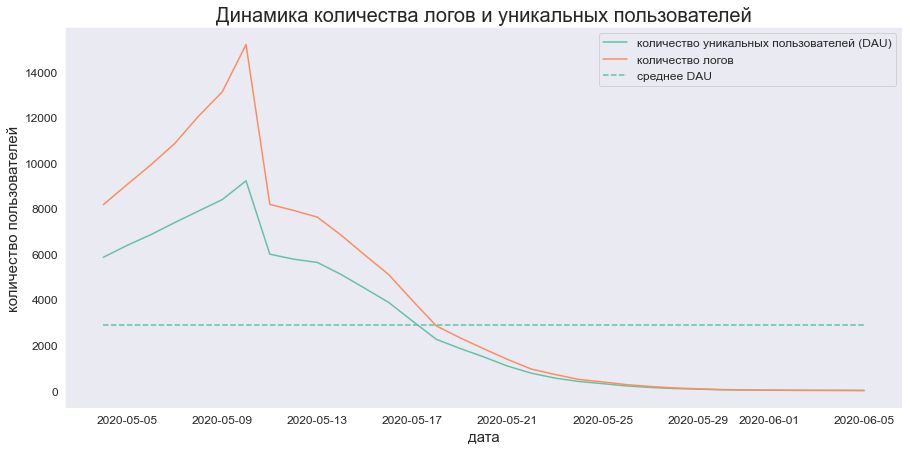

In [27]:
# выведем данные с количеством уникальных пользователей и событий на 1 графике

plt.figure(figsize=(15, 7))
sns.lineplot(x='day', y='user_id', data=dau, label='количество уникальных пользователей (DAU)')
sns.lineplot(x='day', y='event', data=actions.groupby('day').agg({'event': 'count'}).reset_index(), label='количество логов')
plt.hlines(dau_total, dau['day'].min(), dau['day'].max(), linestyles='dashed', label='среднее DAU')
plt.title('Динамика количества логов и уникальных пользователей', fontsize=20)
plt.xlabel('дата', fontsize=15)
plt.ylabel('количество пользователей', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

 - Рост игровой активности наблюдается до 10 мая 2020 г. включительно, на этот день приходится пик количества пользователей, и логов; и одновременно это день окончания формирования когорты
 - После этого активность идет на спад, самое сильное падение наблюдается примерно с 10 до 17 мая включительно, т.е. в течение недели после окончания формирования когорты

In [28]:
wau = (actions.groupby('week')
    .agg({'user_id': 'nunique'})
    .reset_index() \
    .rename(columns={'user_id': 'users'})
)

# для удобства заменим номера недель в году на номер недели относительно начала рассматриваемого периода

wau['week'] = list(range(1, 6))

# рассчитаем в отдельном столбце изменение количества пользователей к первой неделе

wau['cum_chg_%'] = round((wau['users'] / wau['users'][0] - 1) * 100)

wau_total = round(wau['users'].mean())

print('WAU: ', wau_total)

wau.set_index('week')

WAU:  6120


,users,cum_chg_%
week,,
1,13576,0.00
2,12121,-11.00
3,4353,-68.00
4,521,-96.00
5,29,-100.00


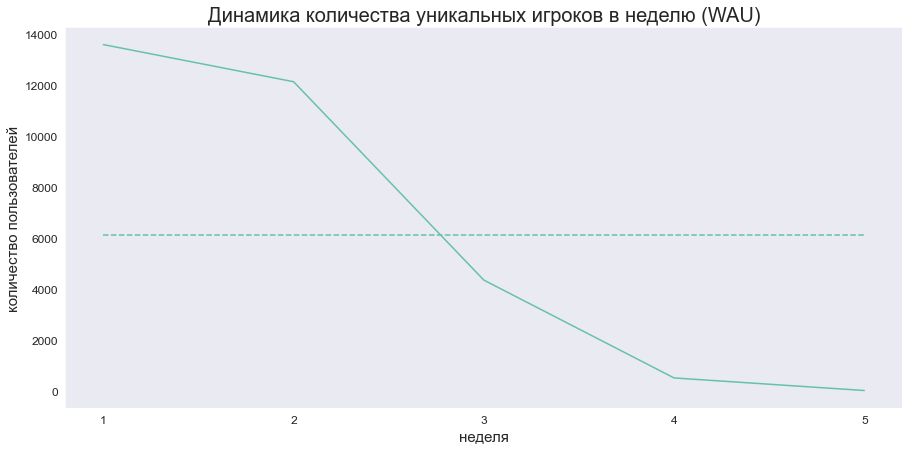

In [29]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='week', y='users', data=wau)
plt.hlines(wau_total, wau['week'].min(), wau['week'].max(), linestyles='dashed')
plt.xlabel('неделя', fontsize=15)
plt.ylabel('количество пользователей', fontsize=15)
plt.title('Динамика количества уникальных игроков в неделю (WAU)', fontsize=20)
plt.xticks(fontsize=12, ticks=list(wau['week']))
plt.yticks(fontsize=12)
#plt.legend([ ])
plt.show()

- По итогам второй недели к первой количество пользователей снижается примерно на 11%, после этого идет резкий спад на протяжении двух недель, в последнюю неделю игроков становится очень мало и снижение не так заметко
- Поскольку нельзя точно определить отток пользователей (часть пользователей ушла, часть перешла на второй уровень), просто посчитаем показатель sticky_factor для определения лояльности пользователей

In [30]:
sticky_factor = dau_total / wau_total
print('Sticky factor за неделю: {:.0%}'.format(sticky_factor))

Sticky factor за неделю: 47%


Sticky factor на уровне 47%  говорит о ***высоком уровне увлеченности пользователей игрой***

 - Для того, чтобы посмотреть динамику количества пользователей, завершивших и не завершивших уровень, разобьем их на 3 группы:

  1) незавершивших - stuck_users
  
  2) завершивших - finished_users:
     - pvp_users (завершение уровня через победу)
     - pve_users (завершение уровня через проект)
     
  
 - Для удобства добавим в датафрейм actions ***новый столбец level_done*** с метками завершения уровня: 'pvp', 'pve', 'stuck'

In [31]:
# список пользователей, завершивших уровень

finished_users = list(actions[(actions['event'] == 'finished_stage_1')]['user_id'].unique())

# список пользователей, застрявших на 1-ом уровне

stuck_users = list(actions[actions['user_id'].apply(lambda x: x not in finished_users)]['user_id'].unique())

In [32]:
# список пользователей, которые перешли на 2-ой уровень через завершение проекта - pve

pve_users = list(
    actions[(actions['event'] == 'project') & (actions['user_id']
    .apply(lambda x: x in finished_users))]['user_id'].unique()
)

In [33]:
# список пользователей, которые перешли на 2-ой уровень через победу другого игрока

pvp_users = list(
    actions[(actions['user_id'].apply(lambda x: x in finished_users)) &
    (actions['user_id'].apply(lambda x: x not in pve_users))]['user_id'].unique()
)

In [34]:
# проверка количества уникальных пользователей после разбиения на группы

len(stuck_users) + len(pve_users) + len(pvp_users) == actions['user_id'].nunique()

True

In [35]:
# функция для раздачи меток завершения уровня

def level_label(row):
    i = row['user_id']
    if i in stuck_users:
        return 'stuck'
    if i in pve_users:
        return 'pve'
    else:
        return 'pvp'

In [36]:
# создадим новый столбец и и применим к нему функцию 

actions['level_done'] = actions.apply(level_label, axis=1)

In [37]:
# проверка раздачи меток

print(len(stuck_users) == actions[actions['level_done'] == 'stuck']['user_id'].nunique())
print(len(pve_users) == actions[actions['level_done'] == 'pve']['user_id'].nunique())
print(len(pvp_users) == actions[actions['level_done'] == 'pvp']['user_id'].nunique())

True
True
True


In [38]:
# создадим функцию для отображения круговой диаграммы

def pie_chart(data, x, labels, title):
    plt.figure(figsize=(15, 7))
    plt.pie(x=x, data=data, labels=labels, autopct='%1.0f%%', textprops={'fontsize': 15})
    plt.title(title, fontsize=20)
    plt.show()    

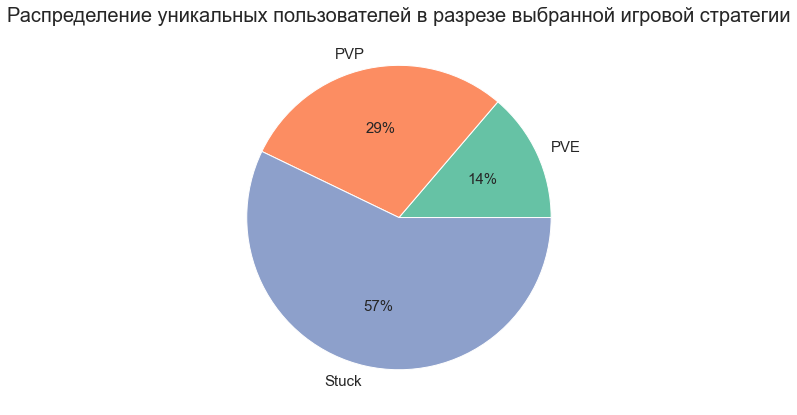

In [39]:
pie_chart(
    actions.groupby(by='level_done').agg({'user_id': 'nunique'}).reset_index(),
    'user_id',
    ['PVE', 'PVP', 'Stuck'],
    'Распределение уникальных пользователей в разрезе выбранной игровой стратегии')

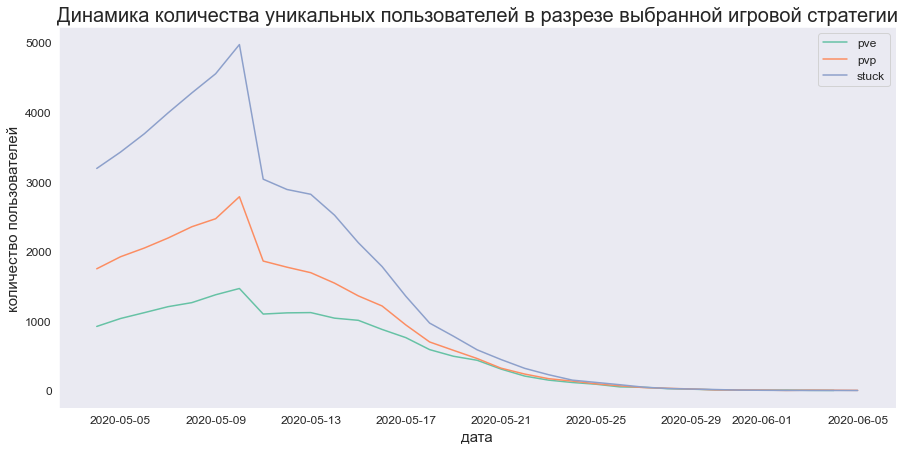

In [40]:
plt.figure(figsize=(15, 7))
data=actions.groupby(['day', 'level_done'])['user_id'].nunique().reset_index()
sns.lineplot(x='day', y='user_id', data=data, hue='level_done')
plt.title('Динамика количества уникальных пользователей в разрезе выбранной игровой стратегии', fontsize=20)
plt.xlabel('дата', fontsize=15)
plt.ylabel('количество пользователей', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

- Динамика количества уникальных пользователей в разрезе выбранной игровой стратегии повторяет график динамики общего числа уникальных пользователей: пик приходится на 10 мая 2020 года, потом начинается спад

##### Предварительный вывод:

**Основные характеристики пользователей мобильной игры**:
 
1) количество уникальных пользователей:
   - общее - 13576,
   - в день -  2885 (DAU)
   - в неделю - 6120 (MAU)

2) sticky factor = 47%, т.е. в среднем ***почти половина пользователей остается в игре по прошествии недели - это хороший показатель вовлеченности пользователей***
 
3) динамика: рост количества игроков и логов наблюдался до 10 мая 2020 г. включительно (день окончания формирования когорты), после этого активность пошла на спад, самое сильное падение наблюдалось в течение 3-ей недели (через неделю после окончания формирования когорты) - на 70% от пика; но оценить реальный отток пользователей не получится, поскольку часть перешла на второй уровень, а не ушла из игры
 
4) ***распределение по стратегиям игры***:
 - ***29% - PVP*** - завершившие уровень через победу
 - ***14% - PVE*** - завершившие уровень через реализацию проекта

#### Анализ распределения событий

In [41]:
print('Количество событий в логе: ', actions.event.count())

Количество событий в логе:  135639


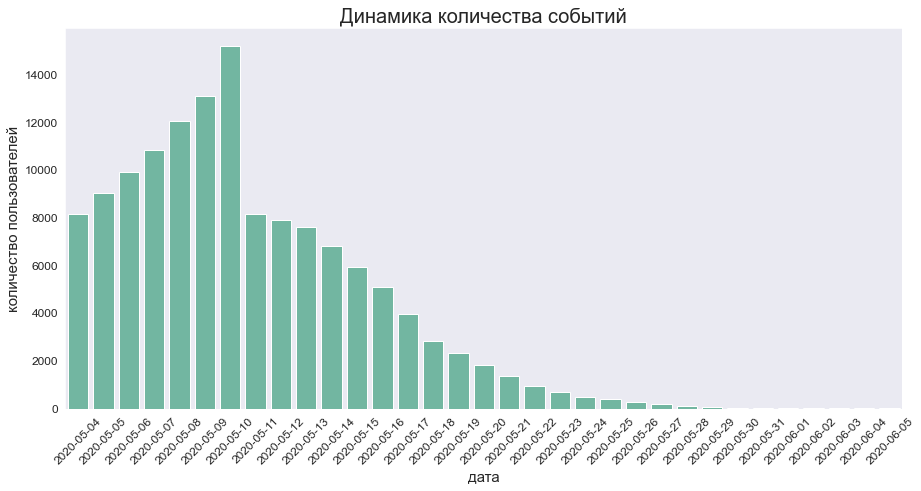

In [42]:
plt.figure(figsize=(15, 7))
data=actions.groupby('day')['user_id'].count().reset_index()
sns.barplot(x='day', y='user_id', data=data, ci=False, palette=palette1)
plt.title('Динамика количества событий', fontsize=20)
plt.xlabel('дата', fontsize=15)
plt.ylabel('количество пользователей', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Динамика количества логов практически идентична динамике количества уникальных пользователей

In [43]:
print('Распределение событий по типу')
pd.DataFrame(
    {'количество логов': actions['event'].value_counts(),
    'доля события': actions['event'].value_counts(normalize=True)}
)

Распределение событий по типу


,количество логов,доля события
building,127956,0.94
finished_stage_1,5817,0.04
project,1866,0.01


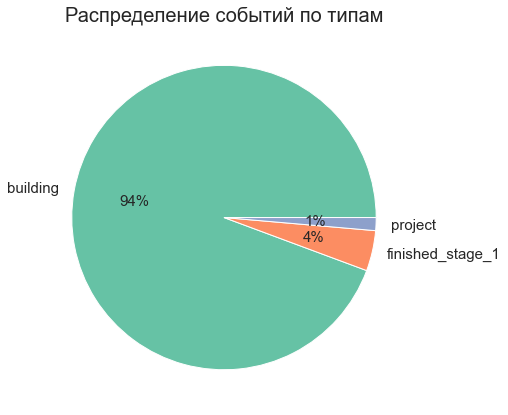

In [44]:
pie_chart(
    actions.groupby('event').agg({'user_id': 'count'}).reset_index(),
    'user_id',
    'event',
    'Распределение событий по типам')

- Ключевым событием игровых стратегий является постройка - это 94% всех логов
- 4% логов - это переход на следующий уровень
- лишь 1% - это завершение проекта

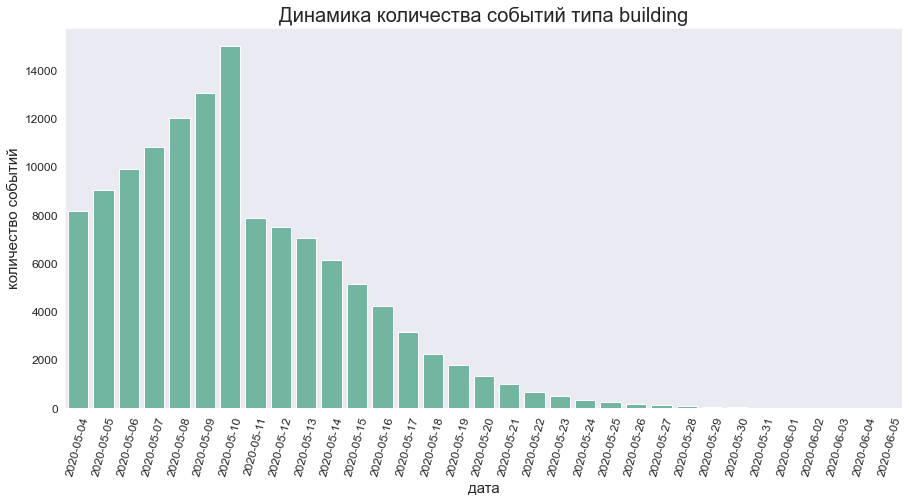

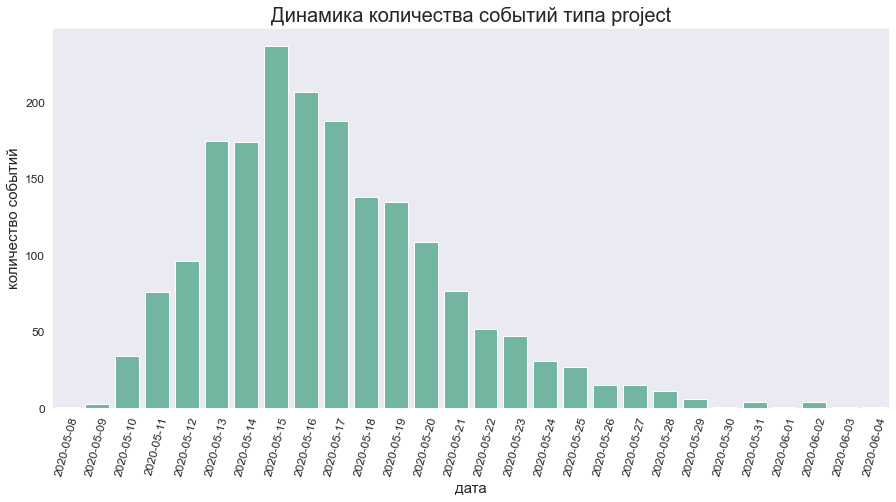

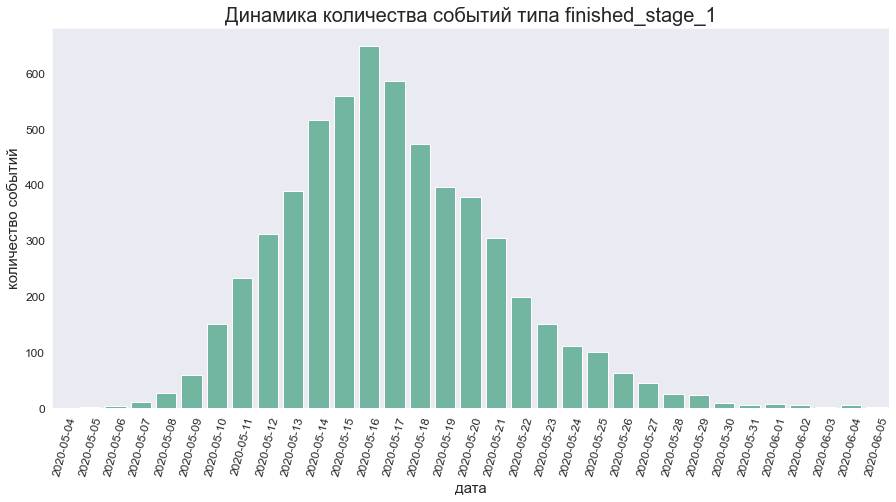

In [45]:
for i in actions['event'].unique():
    plt.figure(figsize=(15, 7))
    data=actions[actions['event'] == i].groupby(['day', 'event'])['user_id'].count().reset_index()
    sns.barplot(x='day', y='user_id', data=data, ci=False, palette=palette1)
    plt.title('Динамика количества событий типа {}'.format(i), fontsize=20)
    plt.xlabel('дата', fontsize=15)
    plt.ylabel('количество событий', fontsize=15)
    plt.xticks(fontsize=12, rotation=75)
    plt.yticks(fontsize=12)
    plt.show()

- Если график динамики события building повторяет график общей динамики количества логов по всем типам событий, то графики по 2-м другим событиям отличаются
- Пик по количеству событий типа project приходится на 15 мая 2020 года, по finished_stage_1  - на 16 мая 2020 года
- По событию project вообще нет логов до 08 мая 2020 года

In [46]:
print(
    'Cреднее количество событий на 1 пользователя:',
    round(actions.groupby(['user_id']).agg({'event': 'count'}).reset_index()['event'].mean())
)

Cреднее количество событий на 1 пользователя: 10


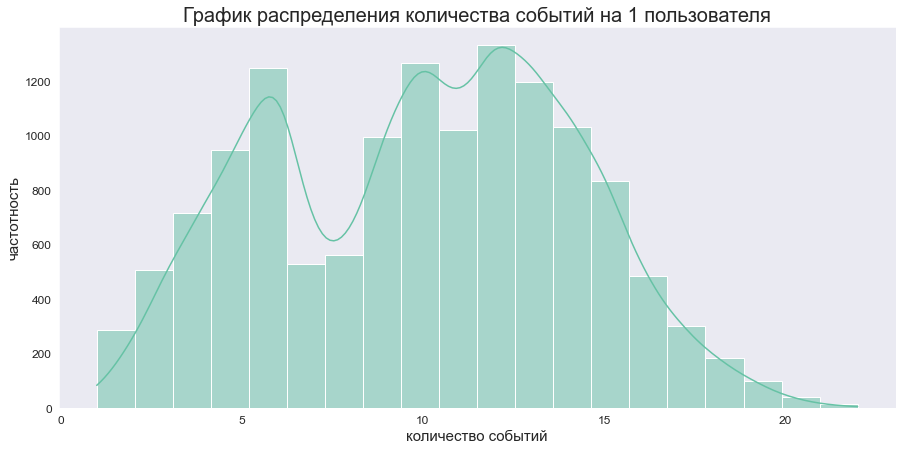

In [47]:
plt.figure(figsize=(15, 7))
sns.histplot(actions.groupby(['user_id']).agg({'event': 'count'}).reset_index()['event'], kde=True , bins=20)
plt.title('График распределения количества событий на 1 пользователя', fontsize=20)
plt.xlabel('количество событий', fontsize=15)
plt.ylabel('частотность', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Распределение похоже на нормальное

In [48]:
# посчитаем среднее количество событий на 1 пользователя в день

events_per_user = (actions.groupby(['day'])
    .agg({'user_id': 'nunique', 'event': 'count'})
    .reset_index()
)

events_per_user['events_per_user'] = (
                                      events_per_user['event'] / 
                                      events_per_user['user_id']
                                      )

print('Cреднее количество событий на 1 пользователя в день:', round(events_per_user['events_per_user'].mean(), 1))

Cреднее количество событий на 1 пользователя в день: 1.3


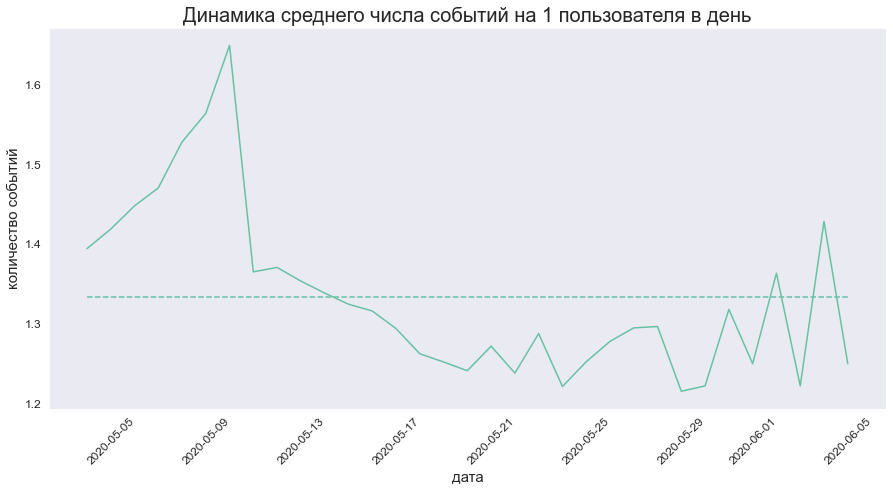

In [49]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='day', y='events_per_user', data=events_per_user)
plt.title('Динамика среднего числа событий на 1 пользователя в день', fontsize=20)
plt.hlines(events_per_user['events_per_user'].mean(), actions['day'].min(), actions['day'].max(), linestyles='dashed')
plt.xlabel('дата', fontsize=15)
plt.ylabel('количество событий', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

В день пользователь совершает порядка 1,3 событий, больше всего - порядка 1,6 также приходится на пик игровой активности - 10 мая 2020 года

In [50]:
# посчитаем среднее количество различных типов событий на пользователя

events_per_user3 = (actions.groupby(['event'])
    .agg({'user_id': ['count', 'nunique']})
    .reset_index()
)
    
events_per_user3['events_per_user'] = (
                                       events_per_user3['user_id', 'count'] /
                                       events_per_user3['user_id', 'nunique']
                                       )

events_per_user3 = round(events_per_user3[['event', 'events_per_user']], 1)

print('Среднее количество событий на 1 пользователя по типам событий')
events_per_user3

Среднее количество событий на 1 пользователя по типам событий


,event,events_per_user
,,
0,building,9.40
1,finished_stage_1,1.00
2,project,1.00


In [51]:
# посчитаем среднее количество событий на пользователя в разрезе игровых стратегий

events_per_user2 = actions.groupby(['level_done']) \
                          .agg({'user_id': ['count', 'nunique']}) \
                          .reset_index()

events_per_user2['events_per_user'] = (
                                       events_per_user2['user_id', 'count'] /
                                       events_per_user2['user_id', 'nunique']
                                       )

events_per_user2 = round(events_per_user2[['level_done', 'events_per_user']], 1)

print('Среднее количество событий на 1 пользователя в разрезе игровых стратегий')
events_per_user2

Среднее количество событий на 1 пользователя в разрезе игровых стратегий


,level_done,events_per_user
,,
0,pve,14.60
1,pvp,10.40
2,stuck,8.70


In [52]:
# посчитаем среднее количество событий типа building на пользователя в разрезе игровых событий
# и объединими с датасэтом по всем типам событий

events_per_user4 = (actions[actions['event'] == 'building']
    .groupby('level_done')
    .agg({'user_id': ['count', 'nunique']})
    .reset_index()
)
    
events_per_user4['events_per_user'] = (
                                       events_per_user4['user_id', 'count'] /
                                       events_per_user4['user_id', 'nunique']
                                       )

events_per_user4 = events_per_user4[['level_done', 'events_per_user']]

events_per_user4['event'] = 'building'
events_per_user2['event'] = 'any event'

events_per_user4 = pd.concat([events_per_user2, events_per_user4], axis=0)

print('Среднее количество событий на 1 пользователя в разрезе игровых стратегий')
events_per_user4

Среднее количество событий на 1 пользователя в разрезе игровых стратегий


,level_done,events_per_user,event
,,,
0,pve,14.60,any event
1,pvp,10.40,any event
2,stuck,8.70,any event
0,pve,12.65,building
1,pvp,9.41,building
2,stuck,8.66,building


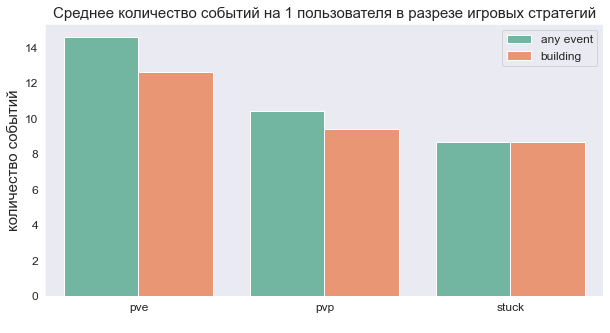

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(x='level_done', y='events_per_user', data=events_per_user4, hue='event')
plt.title('Среднее количество событий на 1 пользователя в разрезе игровых стратегий', fontsize=15)
plt.xlabel(' ')
plt.ylabel('количество событий', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

##### Предварительный вывод:
1. **Основные характеристики событий мобильной игры**:
 
1) общее количество в логе - 135639
   
2) ***распределение по типам***:
 - ***94% - building*** (постройка)
 - 4% - finished_stage_1 (завершение уровня)
 - 1% - project (проект)
 
3) ***среднее количество событий на 1 пользователя***:
- в день - 1,3 события
 - ***за весь период - 10 событий***:
   - по типам событий:
     - ***building*** - 9,4 события:
       - ***12,7 - для PVE***
       - 9,4 - для PVP
     - finished_stage_1 - 1 событие
     - project - 1 событие
   - по игровым стратегиям:
     - ***PVE - 14,6 события*** 
     - PVP - 10,4 события

4) распределение событий по типу построек:
   - ***spaceport - 46%*** - 1-я постройка, необходимая для реализации проекта 
   - assembly_shop - 43% - 2-я постройка
   - research_center - 11% - 3-я постройка
    
2. С точки зрения количества событий на пользователя и планов по дальнейшей монетизации ***самыми перспективными выглядят пользователи стратегии pve***, на которых приходится в среднем порядка 15 различных событий и в том числе почти 13 построек, которые как раз являются событиями планируемой монетизации (страница показа рекламы)   

#### Анализ распределения типов построек

In [54]:
actions['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14137
Name: building_type, dtype: int64

In [55]:
print('Распределение типов построек по количеству логов')
pd.DataFrame(
             {'number_buildings': actions['building_type'].value_counts(),
             'share': actions['building_type'].value_counts(normalize=True)}
             )

Распределение типов построек по количеству логов


,number_buildings,share
spaceport,59325,0.46
assembly_shop,54494,0.43
research_center,14137,0.11


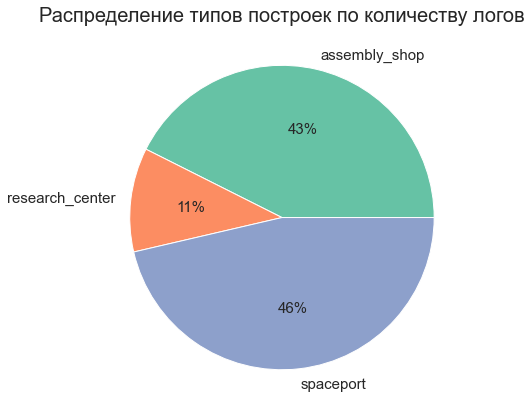

In [56]:
pie_chart(
    actions.groupby(by='building_type').agg({'user_id': 'count'}).reset_index(),
    'user_id',
    'building_type',
    'Распределение типов построек по количеству логов')

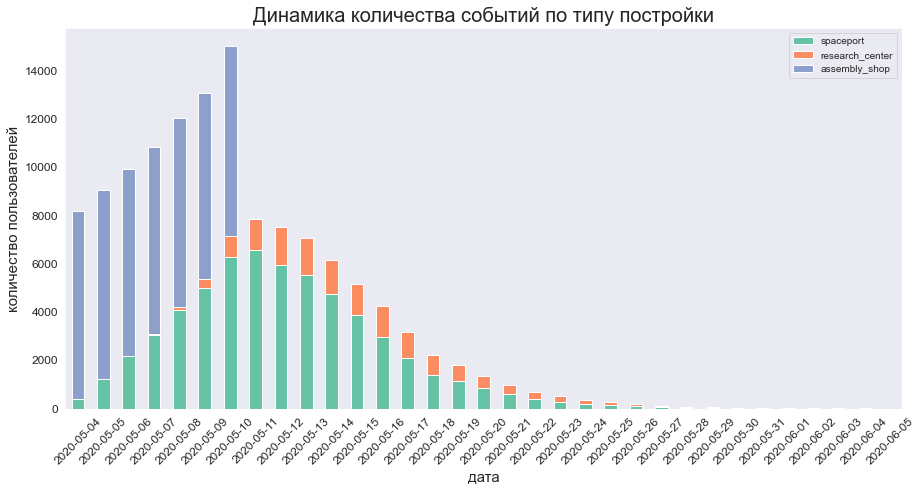

In [57]:
data=actions.groupby(['building_type', 'day']).size().reset_index().pivot(columns='building_type', index='day', values=0)
data=data[['spaceport', 'research_center', 'assembly_shop']]
data.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Динамика количества событий по типу постройки', fontsize=20)
plt.xlabel('дата', fontsize=15)
plt.ylabel('количество пользователей', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

- Судя по графику динамики типов построек первую постройку, которую необходимо сделать для реализации проекта - это assembly_shop, затем идет spaceport, и в самом конце research_center

##### Предварительный вывод:
По типу постройки события распределены следующим образом:
   - ***spaceport - 46%*** - 1-я постройка, необходимая для реализации проекта 
   - assembly_shop - 43% - 2-я постройка
   - research_center - 11% - 3-я постройка


#### Анализ времени нахождения в игре/завершения уровня

In [58]:
time = (actions.groupby('user_id')
    .agg({'day': ['min', 'max']})
    .reset_index()
)

time.columns = ['user_id', 'start', 'end']
time['time'] = (time['end'] - time['start']).dt.days + 1

print('Среднее время нахождения пользователя в мобильной игре:', round(time['time'].mean(), 1), 'дней')

Среднее время нахождения пользователя в мобильной игре: 11.6 дней


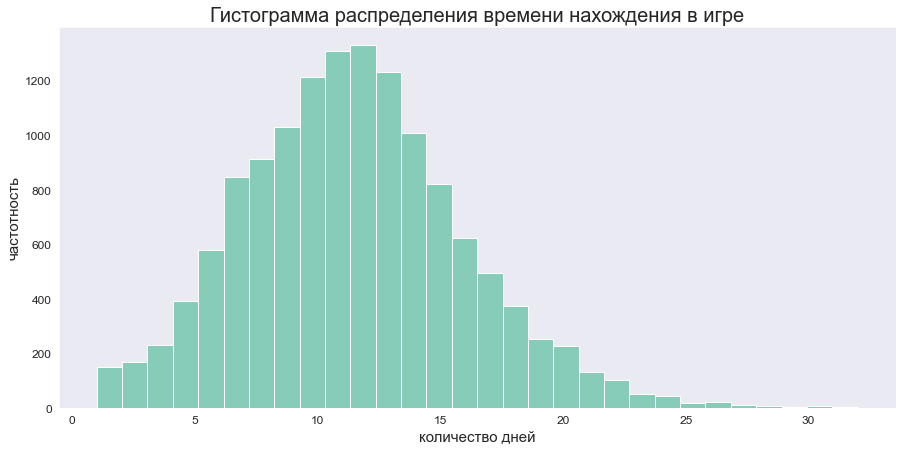

In [59]:
plt.figure(figsize=(15, 7))
sns.histplot(x='time', data=time, bins=30)
plt.xlabel('количество дней', fontsize=15)
plt.ylabel('частотность', fontsize=15)
plt.title('Гистограмма распределения времени нахождения в игре', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Распределение похоже на нормальное, чуть скошено вправо

In [60]:
time2 = (actions.groupby(['user_id', 'level_done'])
    .agg({'day': ['min', 'max']})
    .reset_index()
)

time2.columns = ['user_id','level_done', 'start', 'end']

time2['time'] = (time2['end'] - time2['start']).dt.days + 1

time2 = time2.groupby('level_done').agg({'time': 'mean'}).reset_index()

time2.loc[3] = ['mean_user', time['time'].mean()]

print('Среднее время нахождения пользователя в мобильной игре в разрезе игровых стратегий, дней')
time2

Среднее время нахождения пользователя в мобильной игре в разрезе игровых стратегий, дней


,level_done,time
0,pve,14.40
1,pvp,12.06
2,stuck,10.75
3,mean_user,11.63


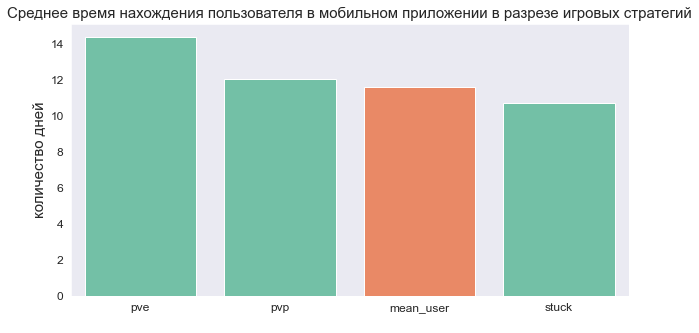

In [61]:
plt.figure(figsize=(10, 5))
data=time2.sort_values(by='time', ascending=False)
palette2 = ['coral' if x == 'mean_user' else 'mediumaquamarine' for x in list(data['level_done'])]
sns.barplot(x='level_done', y='time', data=data, palette=palette2)
plt.title('Среднее время нахождения пользователя в мобильном приложении в разрезе игровых стратегий', fontsize=15)
plt.xlabel(' ')
plt.ylabel('количество дней', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Предварительный вывод:
- Среднее время нахождения пользователей в мобильной игре сооставляет порядка ***12 дней***
- Самая длительная по времени, и самая привлекательная с точки зрения планируемой монетизации, ***стратегия - PVE: среднее время в игре более 14 дней***

### Анализ маркетинговых расходов

In [62]:
print('Cуммарные расходы на рекламу:', round(costs['cost'].sum()))

Cуммарные расходы на рекламу: 7604


In [63]:
# посчитаем рекламные затраты в день

costs_per_day = (costs.groupby('day')
    .agg({'cost': 'sum'})
    .reset_index()
)

# добавим столбец изменения затрат день ко дню

costs_per_day['chg_%'] = round(costs_per_day['cost'].pct_change() * 100)
costs_per_day

,day,cost,chg_%
0,2020-05-04,3302.45,NaN
1,2020-05-05,1865.00,-44.00
2,2020-05-06,1029.43,-45.00
3,2020-05-07,620.48,-40.00
4,2020-05-08,391.85,-37.00
5,2020-05-09,242.77,-38.00
6,2020-05-10,151.59,-38.00


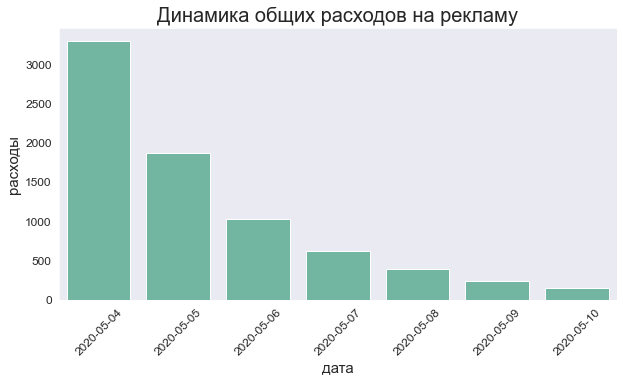

In [64]:
plt.figure(figsize=(10, 5))
data=costs.groupby(by='day').agg({'cost': 'sum'}).reset_index()
sns.barplot(x='day', y='cost', data=data, palette=palette1)
plt.xlabel('дата', fontsize=15)
plt.ylabel('расходы', fontsize=15)
plt.title('Динамика общих расходов на рекламу', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

- Рекламные расходы за первый день составляют более 40% от общего рекламного бюджета
- Каждый день наблюдается снижение общих расходов на 40%-45% к предыдущему дню

In [65]:
# рассчитаем количество построек в день
# разбивку по источникам используем в п. 3

buildings_per_day = (actions[actions['event'] == 'building']
    .groupby(['day', 'source'])
    .agg({'user_id' :'count'})
    .reset_index()
    .rename(columns={'user_id': 'number_buildings'})
)

In [66]:
# рассчитаем размер окупаемости постройки за весь рассматриваемый период

payback_per_building = costs_per_day['cost'].sum() / buildings_per_day['number_buildings'].sum()

print(
      'Точка безубыточности с 1 постройки, при запуске монетизации:',
       round(payback_per_building, 2), 'единиц'
      )

Точка безубыточности с 1 постройки, при запуске монетизации: 0.06 единиц


In [67]:
len(actions[actions['event'] == 'building'])

127956

In [68]:
print(
      'Возможная прибыль от монетизации при стоимости просмотра постройки = 0,07 единиц:',
       round(len(actions[actions['event'] == 'building']) * (0.07 - 0.06)), 'единиц'
          )

Возможная прибыль от монетизации при стоимости просмотра постройки = 0,07 единиц: 1280 единиц


#### Предварительный вывод:
1) Cуммарные расходы на рекламу составляют 7604 единиц

2) Расходы на 1 событие просмотра страницы постройки составляют ***0.06 единиц - точка безубыточности***

3) При стоимости монетизации 1 просмотра события постройки на уровне ***0,07 единиц, которую предполагает заказчик, маркетинговые затраты отобьются*** с некоторой прибылью (порядка 1280 единиц) при условии сохранения схожей пользовательской активности

### Вывод:

1. **Основные характеристики игровой активности пользователей мобильного приложения**:
_______________________________________________________________________________________________________________________________
**1) Период:**
- Данные о рекламных расходах - за 7 дней: с 2020-05-04 по 2020-05-09 включительно
- Данные о действиях пользователей - за 33 дня: с 2020-05-04 по 2020-06-05 включительно
_______________________________________________________________________________________________________________________________

**2) Характеристики пользователей**:

2.1) количество пользователей:
  
 - всего уникальных - 13576
 - в день -  2885 (DAU)
 - в неделю - 6120 (MAU)
 - sticky factor = 47%, т.е. в среднем ***почти половина пользователей остается в игре по прошествии недели - это хороший показатель вовлеченности пользователей***
 
2.3) динамика: рост количества игроков и логов наблюдался до 10 мая 2020 г. включительно (день окончания формирования когорты), после этого активность пошла на спад, самое сильное падение наблюдалось в течение 3-ей недели (через неделю после окончания формирования когорты) - на 70% от пика; но оценить реальный отток пользователей не получится, поскольку часть перешла на второй уровень, а не ушла из игры
 
2.4) ***распределение пользователей по стратегиям игры***:
 - ***29% - PVP*** - завершившие уровень через победу
 - ***14% - PVE*** - завершившие уровень через реализацию проекта
_______________________________________________________________________________________________________________________________
**3) Характеристики событий**:

3.1) количество событий:

 - всего в логе - 135639
 
3.2) ***распределение событий по типам***:
 - ***94% - building*** (постройка)
 - 4% - finished_stage_1 (завершение уровня)
 - 1% - project (проект)
 
3.4) ***среднее количество событий на 1 пользователя***:
 - в день - 1,3 события
 - ***за весь период - 10 событий***:
   - по типам событий:
     - ***building - 9,4 события***:
       - 12,7 - для PVE
       - 9,4 - для PVP
     - finished_stage_1 - 1 событие
     - project - 1 событие
   - по игровым стратегиям:
     - ***PVE - 14,6 события*** 
     - PVP - 10,4 события

3.5) распределение событий по типу построек:
   - ***spaceport - 46%*** - 1-я постройка, необходимая для реализации проекта 
   - assembly_shop - 43% - 2-я постройка
   - research_center - 11% - 3-я постройка
  
______________________________________________________________________________________________________________________________
**4) Время нахождения в игре/завершения уровня**:

 - по всем пользователям: ***11,6 дней***
 - в разрезе игровых стратегий:
   - ***PVE 14,4*** 
   - ***PVP 12,1***
______________________________________________________________________________________________________________________________
**5) Расходы на рекламу**:

 - суммарные расходы - 7604 единиц
 - ***расходы на 1 событие просмотра страницы постройки - 0.06 единиц*** (точка безубыточности)
______________________________________________________________________________________________________________________________
2. **Основные выводы по разделу**: 

1) С точки зрения количества событий на пользователя и планов по дальнейшей монетизации ***самыми перспективными выглядят пользователи стратегии PVE***, которые проводят в игре более 14 дней (на 2 дня больше, чем PVP) и на которых приходится в среднем порядка 15 различных событий и в том числе почти 13 построек, которые как раз являются событиями планируемой монетизации (страница показа рекламы)

2) При стоимости монетизации 1 просмотра события постройки на уровне ***0,07 единиц, которую предполагает заказчик, маркетинговые затраты отобьются с некоторой  прибылью (порядка 1280 единиц)*** при условии сохранения схожей пользовательской активности

## Анализ влияния источника перехода в игру на поведение пользователя

### Анализ распределения игровой активности по рекламным источникам

#### Анализ распределения пользователей

In [69]:
print('Распределение рекламных источников по количеству пользователей')
pd.DataFrame(
             {'number_users': source['source'].value_counts(),
             'share': source['source'].value_counts(normalize=True)}
             )

Распределение рекламных источников по количеству пользователей


,number_users,share
yandex_direct,4817,0.35
instagram_new_adverts,3347,0.25
facebook_ads,2726,0.20
youtube_channel_reklama,2686,0.20


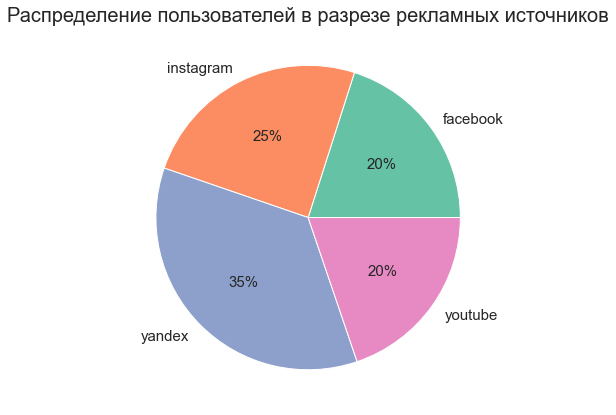

In [70]:
pie_chart(
    actions.groupby('source')['user_id'].nunique().reset_index(),
    'user_id',
    'source',
    'Распределение пользователей в разрезе рекламных источников')

- С точки зрения количества привлеченных пользователей ***самым крупным источником является Yandex***, из которого в приложение пришли порядка 4800 пользователей (35%)
- Еще около 3350 пользователей пришли из Instagram (25%)
- И по 2700 (по 20%) пользователей пришло из Facebook и Youtube

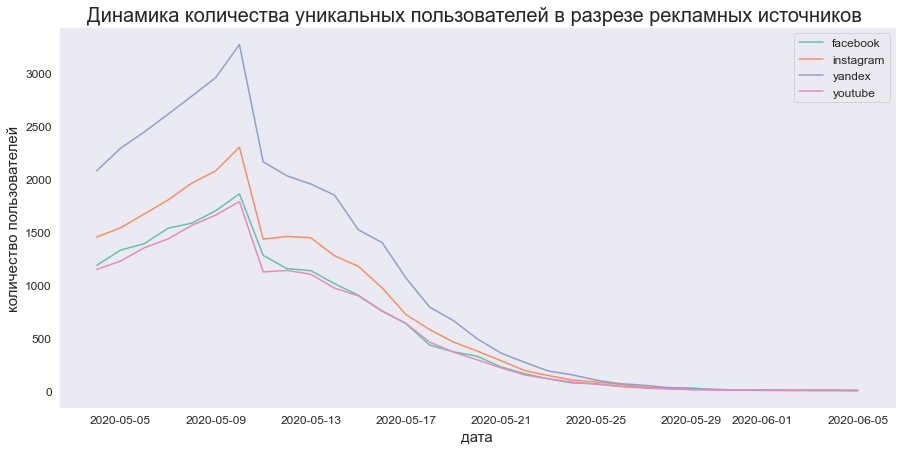

In [71]:
plt.figure(figsize=(15, 7))
data = actions.groupby(['day', 'source'])['user_id'].nunique().reset_index()
sns.lineplot(x='day', y='user_id', data=data, hue='source')
plt.title('Динамика количества уникальных пользователей в разрезе рекламных источников ', fontsize=20)
plt.xlabel('дата', fontsize=15)
plt.ylabel('количество пользователей', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

- Динамика количества уникальных пользователей в разрезе рекламных источников повторяют общую динамику данного показателя
- Никаких существенных различий между источниками нет

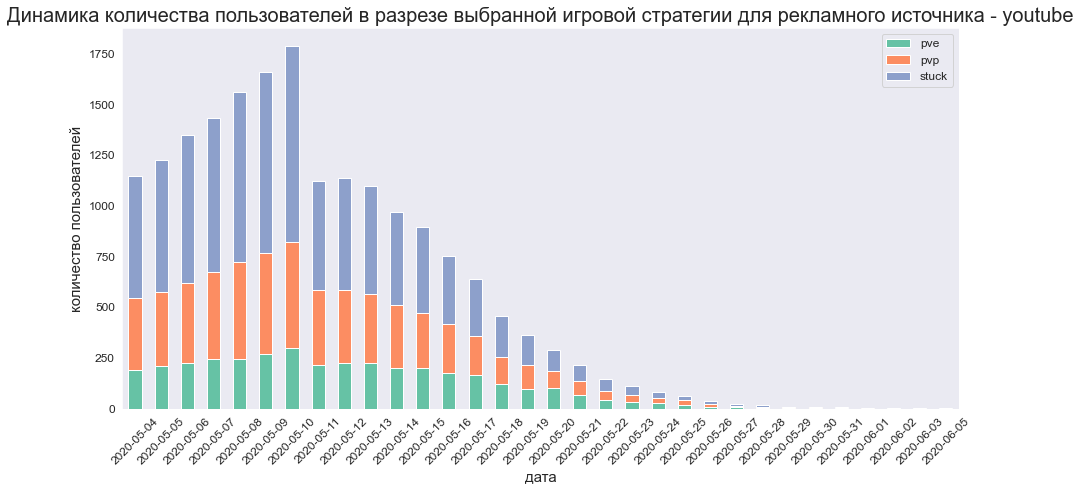

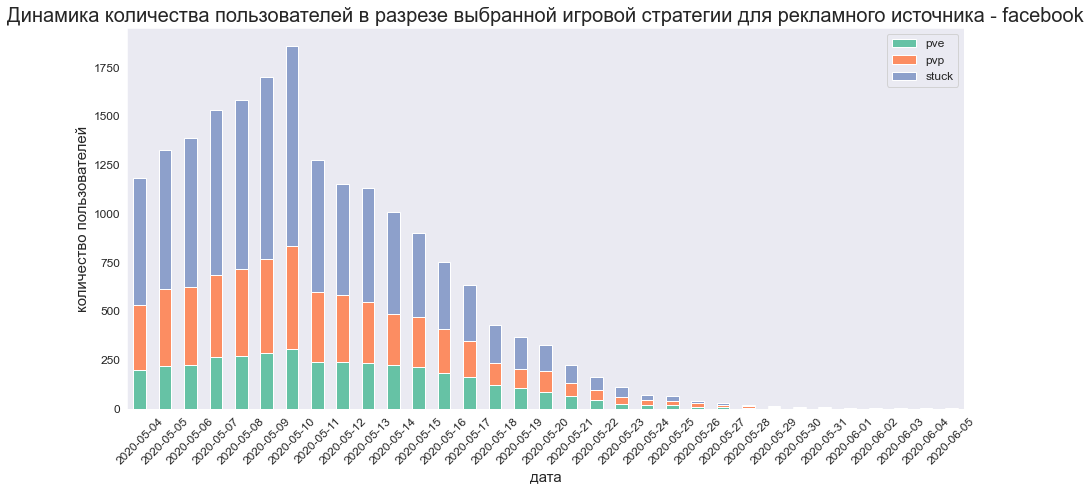

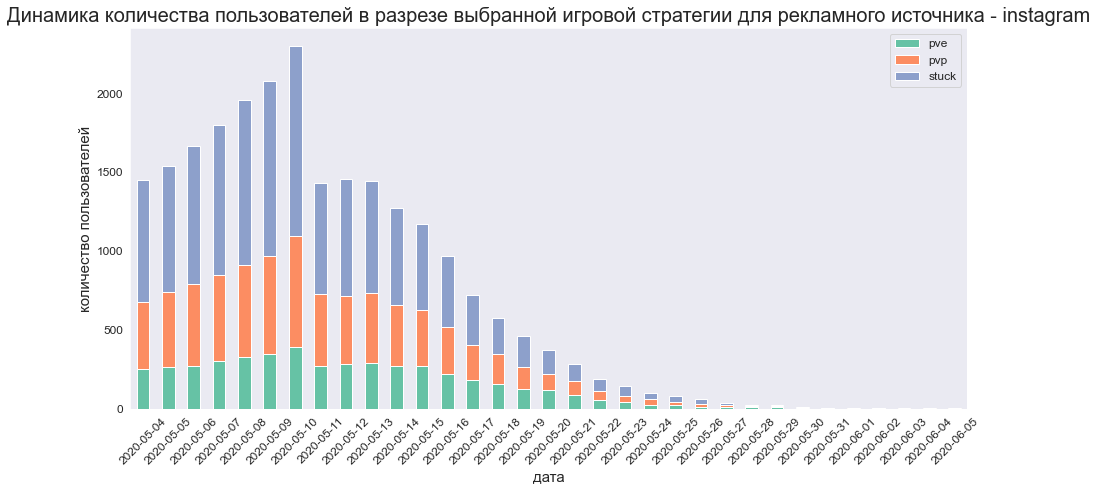

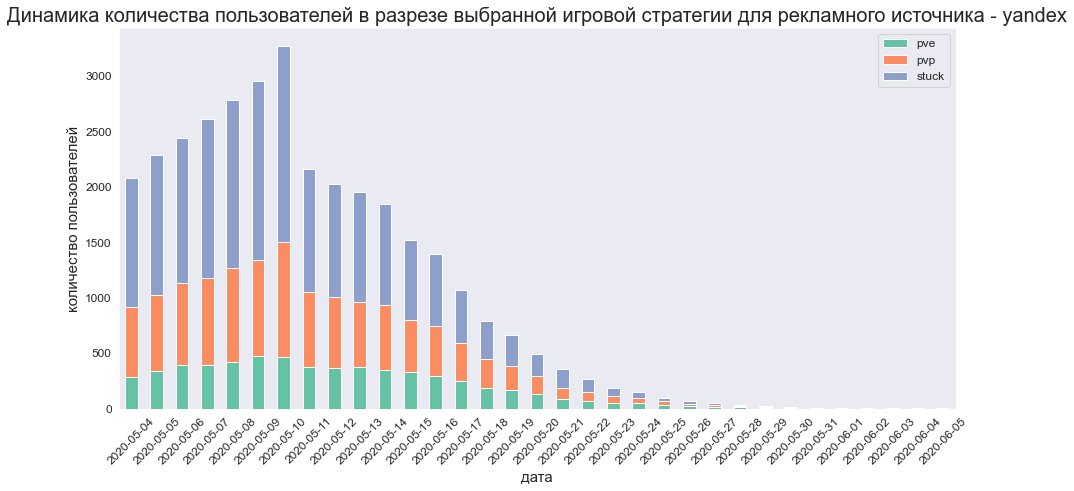

In [72]:
for i in actions['source'].unique():
    data = (actions[actions['source'] == i]
        .groupby(['level_done', 'day'])['user_id'].nunique()
        .reset_index() \
        .pivot(columns='level_done', index='day')
        )
    
    data.plot(kind='bar', stacked=True, figsize=(15, 7))
    plt.title(
              'Динамика количества пользователей в разрезе выбранной игровой стратегии для рекламного источника - {}'
               .format(i) , fontsize=20
              )
    plt.xlabel('дата', fontsize=15)
    plt.ylabel('количество пользователей', fontsize=15)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(['pve', 'pvp', 'stuck'], fontsize=12)
    plt.show()

- Динамика количества пользователей в разрезе игровых стратегий похожа по всем источникам

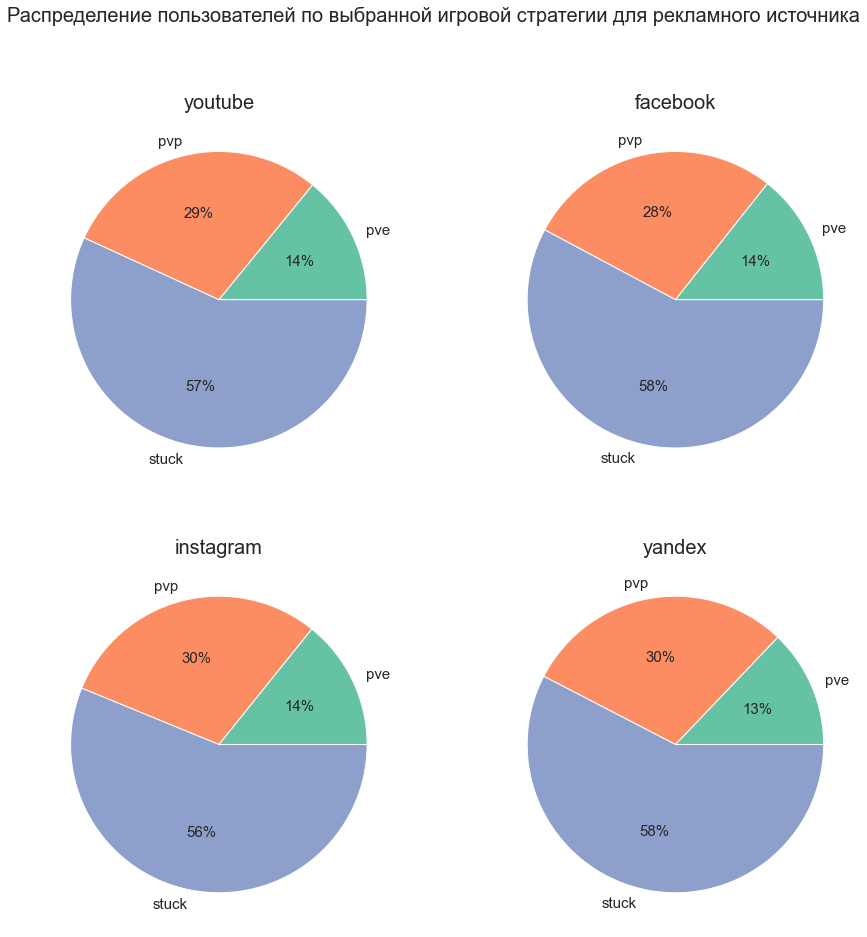

In [73]:
plt.figure(figsize=(15, 15))

for i in enumerate(actions['source'].unique()):
    data=actions[actions['source'] == i[1]].groupby(['source', 'level_done'])['user_id'].nunique().reset_index()
    plt.subplot(2, 2, i[0]+1)
    plt.pie(x='user_id', data=data, labels='level_done', autopct='%1.0f%%', textprops={'fontsize': 15})
    plt.title('{}'.format(i[1]), fontsize=20)

plt.suptitle('Распределение пользователей по выбранной игровой стратегии для рекламного источника', fontsize=20)
plt.show()

- По распределению стратегий среди общего числа игроков никаких существенных отличий между рекламными источниками, откуда они пришли, есть лишь незначительные отличия

##### Предварительный вывод:
1) По количеству привлеченных пользователей:
 - ***самым крупным источником является Yandex***, из которого в приложение пришли порядка 4800 пользователей (35%)
 - около 3350 пользователей пришли из instagram (25%)
 - по 2700 (по 20%) пользователей пришло из Facebook и Youtube

2) Распределения пользователей по рекламным источникам практически повторяют общее распределение по всем источникам и имеют лишь незначительные различия:
 - самая большая доля stuck-пользователей у Yandex (58%), и одновременно, самая маленькая доля PVE-пользователей (13%)
 - наоборот, лучшие показатели у Youtube: 14% - PVE, 57% - Stuck

#### Анализ распределения событий

In [74]:
print('Распределение рекламных источников по количеству пользователей и событий')

users_events_sources = (actions.groupby('source')
    .agg({'user_id': 'nunique', 'event': 'count'})
    .rename(columns={'user_id': 'number_users', 'event': 'number_events'})
    .reset_index()
)

users_events_sources['events_per_user'] = round(users_events_sources['number_events'] / users_events_sources['number_users'])
users_events_sources

Распределение рекламных источников по количеству пользователей и событий


,source,number_users,number_events,events_per_user
0,facebook,2726,27672,10.00
1,instagram,3347,33757,10.00
2,yandex,4817,47694,10.00
3,youtube,2686,26516,10.00


- Также, как и в среднем по всем источникам на 1 пользователя по любому из источников приходится порядка 10 событий
- Различий между источниками нет

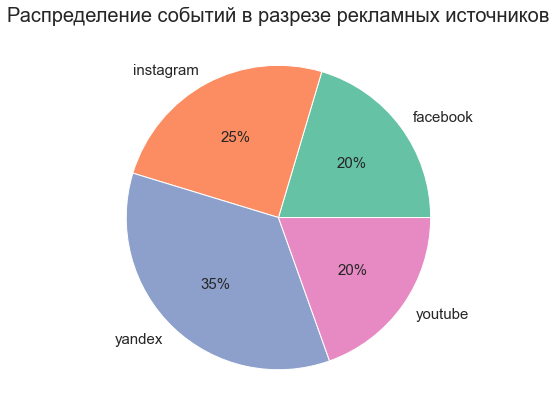

In [75]:
pie_chart(
    actions.groupby('source')['event'].count().reset_index(),
    'event',
    'source',
    'Распределение событий в разрезе рекламных источников')

- Круговая диаграмма распределения событий в разрезе рекламных источников выглядит индентично такой же диаграмме распределения пользователей
- Это происходит потому, что среднее количество событий на 1 пользователя по всем источникам распределено одинаково и составляет также, как и по всем источникам вместе, порядка 10 событий на пользователя за весь первый уровень

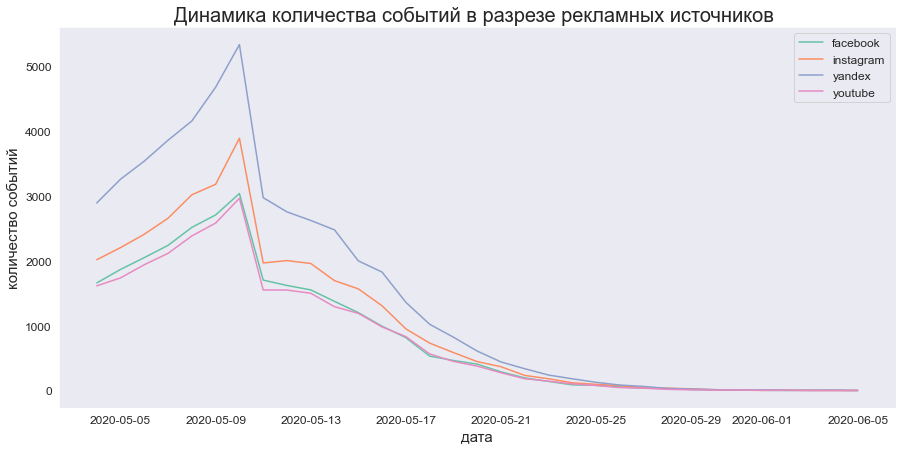

In [76]:
plt.figure(figsize=(15, 7))
data = actions.groupby(['day', 'source'])['event'].count().reset_index()
sns.lineplot(x='day', y='event', data=data, hue='source')
plt.title('Динамика количества событий в разрезе рекламных источников ', fontsize=20)
plt.xlabel('дата', fontsize=15)
plt.ylabel('количество событий', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

- График динамики количества событий в разрезе рекламных источников по тем же причинам повторяет соответствующий график динамики количества пользователей

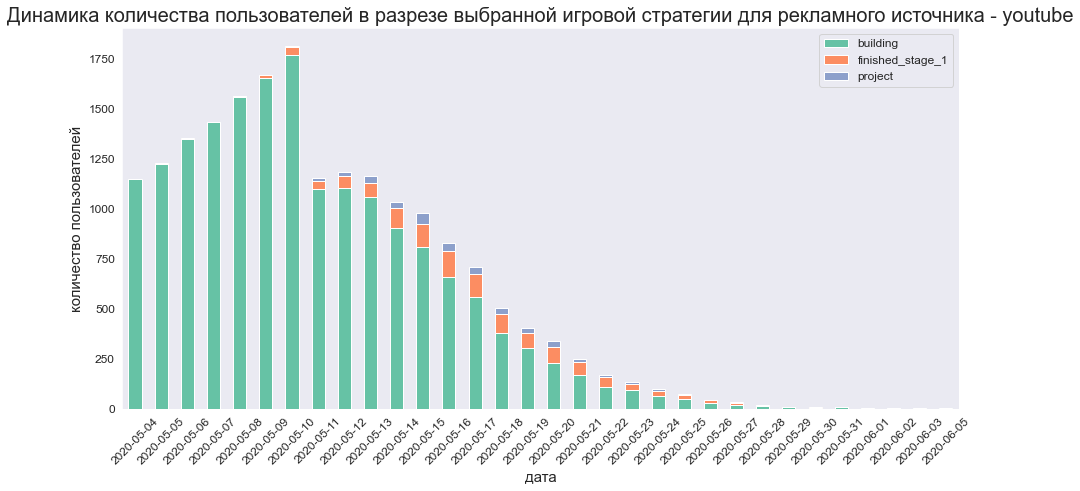

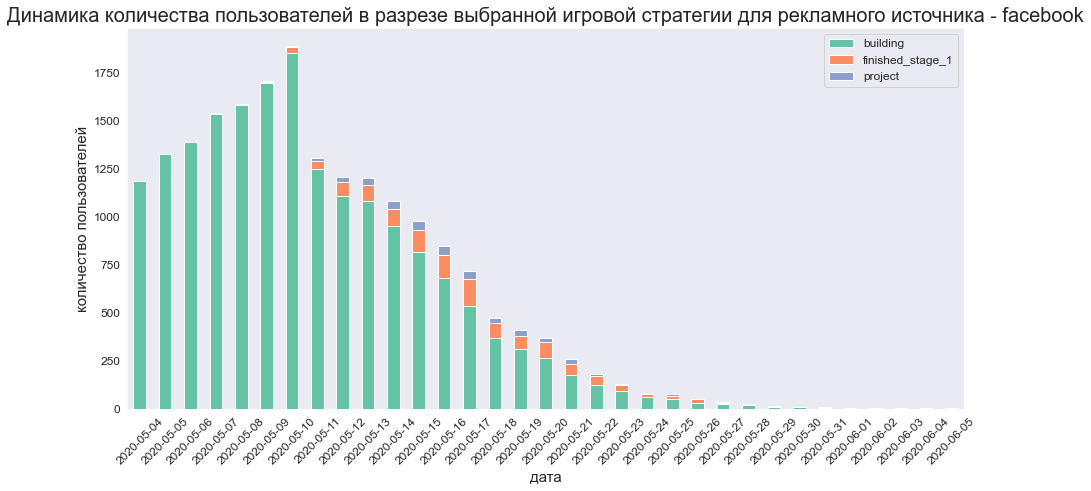

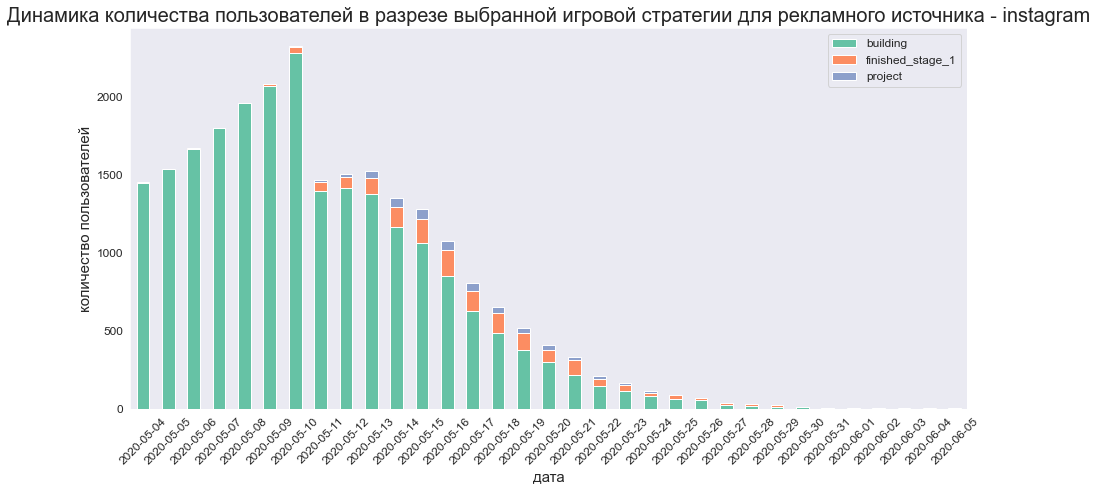

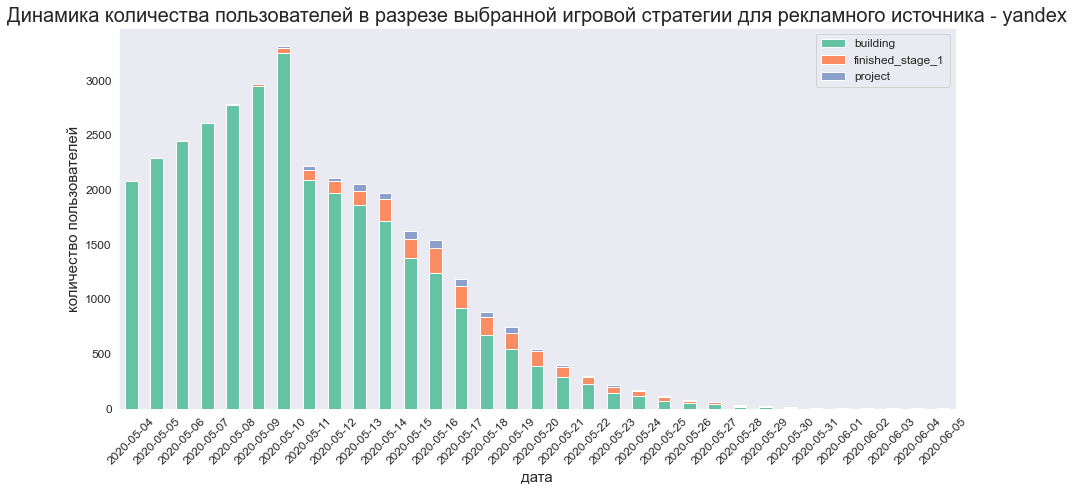

In [77]:
for i in actions['source'].unique():
    
    data=actions[actions['source'] == i] \
                .groupby(['event', 'day'])['user_id'].nunique() \
                .reset_index().pivot(columns='event', index='day')
    
    data.plot(kind='bar', stacked=True, figsize=(15, 7))
    plt.title(
              'Динамика количества пользователей в разрезе выбранной игровой стратегии для рекламного источника - {}'
              .format(i) , fontsize=20
              )
    plt.xlabel('дата', fontsize=15)
    plt.ylabel('количество пользователей', fontsize=15)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(['building', 'finished_stage_1', 'project'], fontsize=12)
    plt.show()

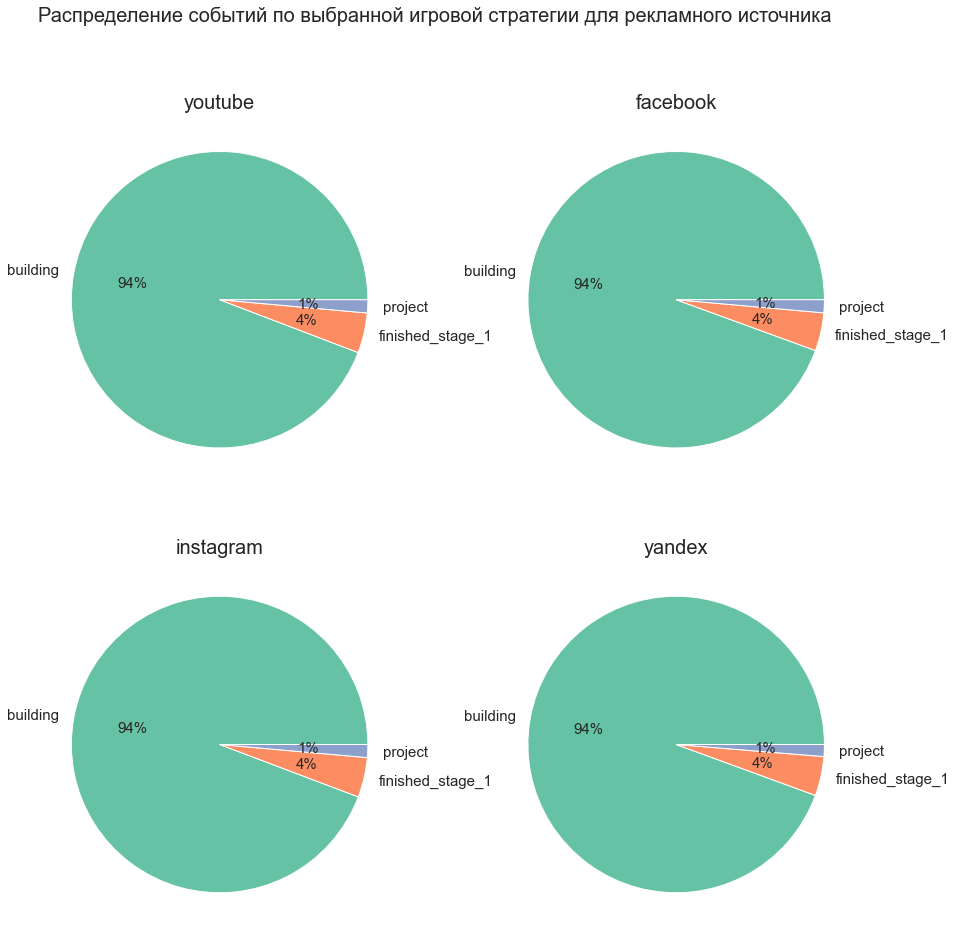

In [78]:
plt.figure(figsize=(15, 15))

for i in enumerate(actions['source'].unique()):
    data=actions[actions['source'] == i[1]].groupby(['source', 'event'])['user_id'].count().reset_index()
    plt.subplot(2, 2, i[0]+1)
    plt.pie(x='user_id', data=data, labels='event', autopct='%1.0f%%', textprops={'fontsize': 15})
    plt.title('{}'.format(i[1]), fontsize=20)

plt.suptitle('Распределение событий по выбранной игровой стратегии для рекламного источника', fontsize=20)
plt.show()

 Гистограммы динамики и круговые диаграммы количества событий по типу похожи по всем источникам: существенных различий нет ни в динамике, ни в долях

In [79]:
# посчитаем количество построек на 1 пользователя в разрезе рекламных источников

buildings_per_sources1 = (actions[actions['event'] == 'building']
    .groupby('source')
    .agg({'event': 'count', 'user_id': 'nunique'})
    .reset_index()
)

buildings_per_sources1.columns = ['source', 'event', 'user_id'] 

buildings_per_sources1['buildings_per_user'] = (
                                            buildings_per_sources1['event'] /
                                            buildings_per_sources1['user_id']
                                       )

buildings_per_sources1

,source,event,user_id,buildings_per_user
0,facebook,26131,2726,9.59
1,instagram,31815,3347,9.51
2,yandex,45032,4817,9.35
3,youtube,24978,2686,9.30


- Среднее количество построек на 1 игрока колеблется от 9,3 до 9,6 в зависмости от источника
- Существенных различий по этому показателю между источниками нет

In [80]:
# посчитаем количество построек на 1 пользователя в разрезе рекламных источников и игровых стратегий


buildings_per_sources2 = (actions[actions['event'] == 'building']
    .groupby(['source', 'level_done'])
    .agg({'event': 'count', 'user_id': 'nunique'})
    .reset_index()
)

buildings_per_sources2.columns = ['source', 'level_done', 'event', 'user_id'] 

buildings_per_sources2['buildings_per_user'] = (
                                            buildings_per_sources2['event'] /
                                            buildings_per_sources2['user_id']
                                       )

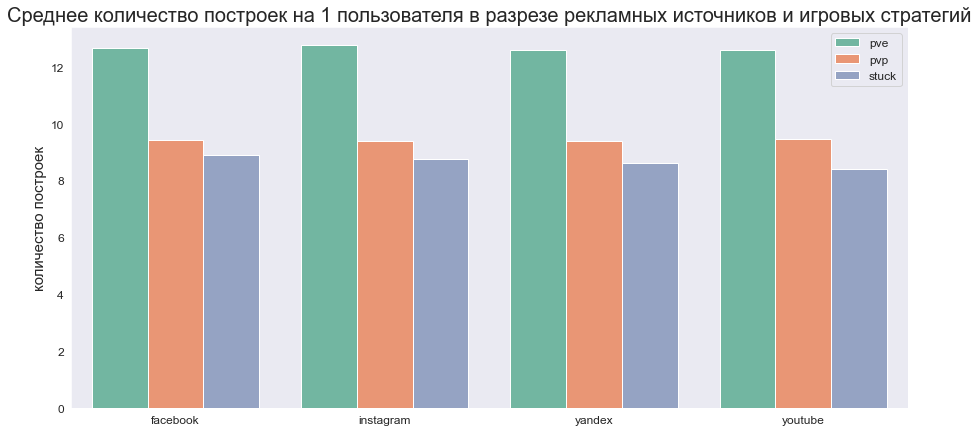

In [81]:
plt.figure(figsize=(15, 7))
sns.barplot(x='source', y='buildings_per_user', data=buildings_per_sources2, hue='level_done')
plt.title(
          'Среднее количество построек на 1 пользователя в разрезе рекламных источников и игровых стратегий'
          , fontsize=20
          )
plt.xlabel(' ')
plt.ylabel('количество построек', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

Игроки, пришедшие из разных источников, также не имеют между собой существенных различий по количеству построек на 1 игрока, как вцелом, так и в разрезе игровых стратегий

##### Предварительный вывод:
**Никаких заметных различий в распределении количества пользователей по источникам нет**:
- Среднее количество событий практически идентично и равно примерно ***10 событиям на игрока*** по всем источникам
- Среднее количество построек на 1 игрока колеблется от 9,3 до 9,6 в зависимости от источника при средней в 9,4 по всем источникам (в разрезе игровых стратегий по этому показателю также нет существенных различий)
- ***Доля событий построек по каждому источнику - 94%, как и по всем пользователям в целом***

#### Анализ времени нахождения в игре/завершения уровня

In [82]:
# посчитаем среднее время нахождения пользователя в игре в разреpе рекламных источников

time3 = (actions.groupby(['user_id', 'source'])
    .agg({'day': ['min', 'max']})
    .reset_index()
)

time3.columns = ['user_id','source', 'start', 'end']

time3['time'] = (time3['end'] - time3['start']).dt.days + 1

time3 = time3.groupby('source').agg({'time': 'mean'}).reset_index()

time3.loc[3] = ['mean_user', time['time'].mean()]

print('Среднее время нахождения пользователя в мобильной игре в разреpе рекламных источников, дней')
time3

Среднее время нахождения пользователя в мобильной игре в разреpе рекламных источников, дней


,source,time
0,facebook,11.68
1,instagram,11.75
2,yandex,11.57
3,mean_user,11.63


In [83]:
# посчитаем среднее время нахождения пользователя в игре в разреpе рекламных источников и даты

time4 = (actions.groupby(['user_id', 'source'])
    .agg({'day': ['min', 'max']})
    .reset_index()
)

time4.columns = ['user_id', 'source', 'start', 'end']
time4['time'] = (time4['end'] - time4['start']).dt.days + 1

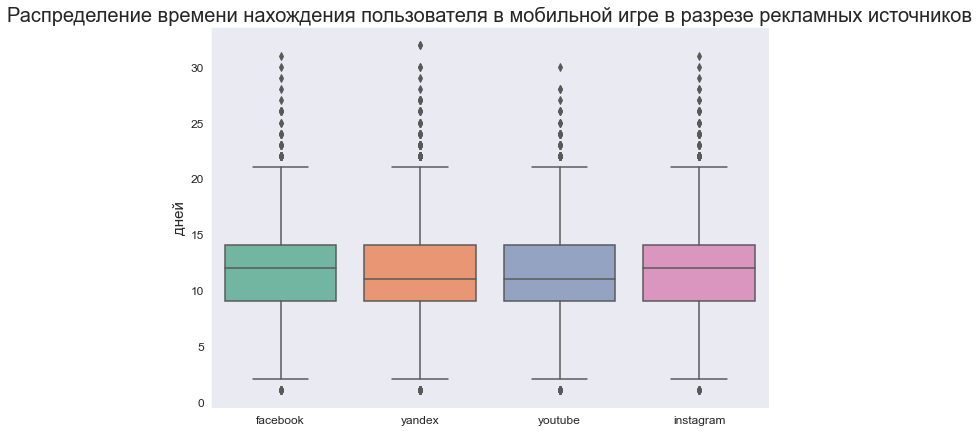

In [84]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='source', y='time', data=time4)
plt.title('Распределение времени нахождения пользователя в мобильной игре в разрезе рекламных источников', fontsize=20)
plt.xlabel(' ')
plt.ylabel('дней', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Среднее время нахождения в игре не зависит от источника, наименьший разброс времени у пришедших из youtube, наибольший у yandex

In [85]:
# посчитаем среднее время нахождения пользователя в игре в разреpе рекламных источников и игровых стратегий

time5 = (actions.groupby(['user_id', 'source', 'level_done'])
    .agg({'day': ['min', 'max']})
    .reset_index()
)

time5.columns = ['user_id','source', 'level_done', 'start', 'end']

time5['time'] = (time5['end'] - time5['start']).dt.days + 1

time5 = time5.groupby(['source', 'level_done']).agg({'time': 'mean'}).reset_index()

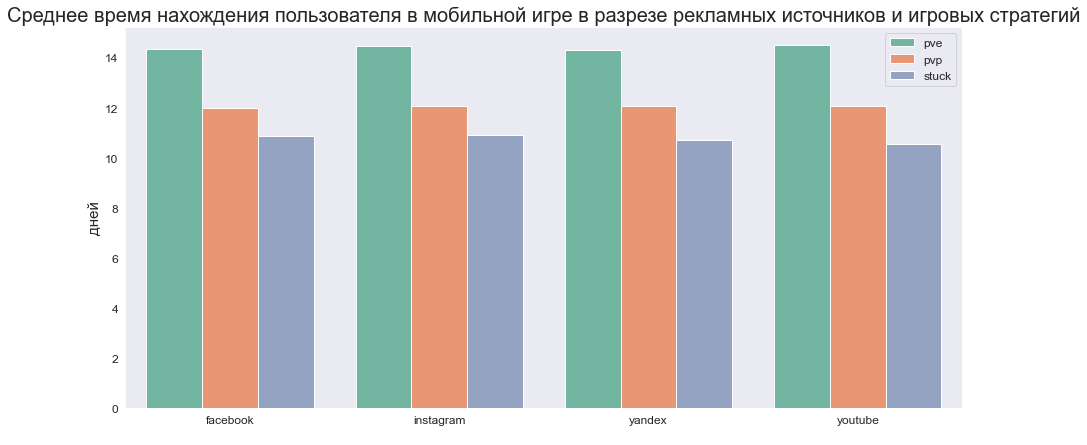

In [86]:
plt.figure(figsize=(15, 7))
sns.barplot(x='source', y='time', data=time5, hue='level_done')
plt.title(
          'Среднее время нахождения пользователя в мобильной игре в разрезе рекламных источников и игровых стратегий'
          , fontsize=20
          )
plt.xlabel(' ')
plt.ylabel('дней', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

- По всем источникам игроки разных стратегий проводят примерно одинаковое время в игре:
  - pve: порядка 14-14,5 дней
  - pvp: порядка 12 дней
  - stuck: порядка 11 дней

In [87]:
# сгруппируем пользователей по времени нахождения в игре в разреpе рекламных источников и игровых стратегий

time6 = (actions.groupby(['user_id', 'source', 'level_done'])
    .agg({'day': ['min', 'max']})
    .reset_index()
)

time6.columns = ['user_id', 'source', 'level_done', 'start', 'end']

time6['time'] = (time6['end'] - time6['start']).dt.days + 1

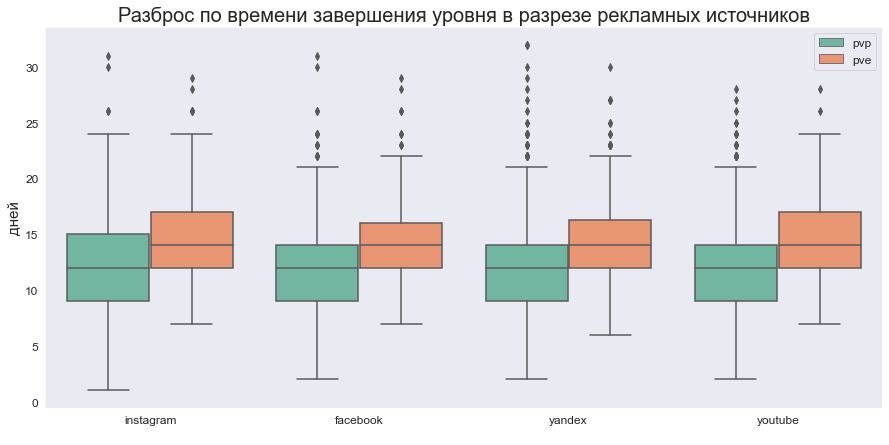

In [88]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='source', y='time', data=time6[time6['level_done'] != 'stuck'], hue='level_done')
plt.title('Разброс по времени завершения уровня в разрезе рекламных источников', fontsize=20)
plt.xlabel(' ')
plt.ylabel('дней', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

По времени нахождения в игре/завершения уровня игроки, пришедшие из разных источников, также не имеют между собой существенных различий: ни в целом по источнику, ни в разрезе игровых стратегий

##### Предварительный вывод:
**Никаких заметных различий в распределении времени нахождения в игре/завершения уровня по источникам нет**: 
- Среднее время в игре, как и по всем пользователям в целом составляет ***порядка 12 дней***
- Среднее время на завершение уровня не зависит от источника (в том числе и в разрезе игровых стратегий)
- Можно отметить лишь наименьший разброс по времени нахождения в игре/завершения уровня у пришедших из Youtube, наибольший у Yandex

### Анализ рекламных расходов на 1 пользователя

In [89]:
cac_per_source = (actions.groupby('source')
    .agg({'user_id': 'nunique'})
    .reset_index()
)

cac_per_source['cost'] =  (costs.groupby('source')
    .agg({'cost': 'sum'})
    .reset_index()['cost']
)

cac_per_source.loc[4] = [
                         'mean',
                          cac_per_source['user_id'].mean(),
                          cac_per_source['cost'].mean()
                         ]

cac_per_source['cac'] = cac_per_source['cost'] / cac_per_source['user_id']
cac_per_source = cac_per_source[['source', 'cac']]
cac_per_source

,source,cac
0,facebook,0.79
1,instagram,0.65
2,yandex,0.46
3,youtube,0.40
4,mean,0.56


- ***Самым дешевым источником привлечения клиентов является Youtube***: САС на уровне 0.40 единиц
- ***Вторым по дешевизне является Yandex***: САС на уровне 0.46 единиц
- Самый дорогой - facebook: 0.79 единицы

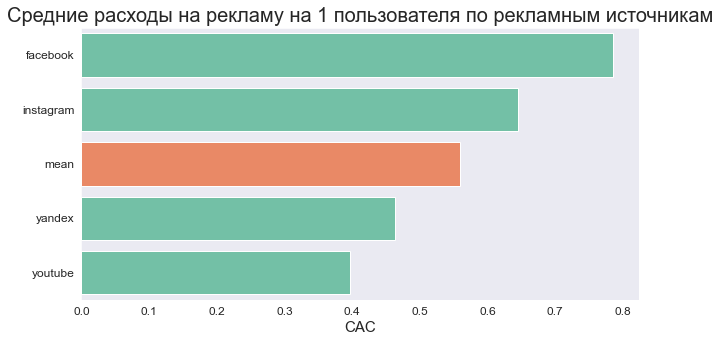

In [90]:
plt.figure(figsize=(10, 5))
data=cac_per_source.sort_values(by='cac', ascending=False)
palette2 = ['coral' if x == 'mean' else 'mediumaquamarine' for x in data['source']]
sns.barplot(y='source', x='cac', data=data, palette=palette2)
plt.xlabel('CAC', fontsize=15)
plt.ylabel('')
plt.title('Средние расходы на рекламу на 1 пользователя по рекламным источникам', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [91]:
# посчитаем затраты на 1 событие постройки по источникам

cost_per_source = (actions[actions['event'] == 'building']
    .groupby('source')
    .agg({'user_id': 'count'})
    .reset_index()
)

cost_per_source['cost'] =  (costs.groupby('source')
    .agg({'cost': 'sum'})
    .reset_index()['cost']
)

cost_per_source.loc[4] = [
                         'mean',
                          cost_per_source['user_id'].mean(),
                          cost_per_source['cost'].mean()
                         ]

cost_per_source['cost_per_building'] = cost_per_source['cost'] / cost_per_source['user_id']
cost_per_source = cost_per_source[['source', 'cost_per_building']]
cost_per_source

,source,cost_per_building
0,facebook,0.08
1,instagram,0.07
2,yandex,0.05
3,youtube,0.04
4,mean,0.06


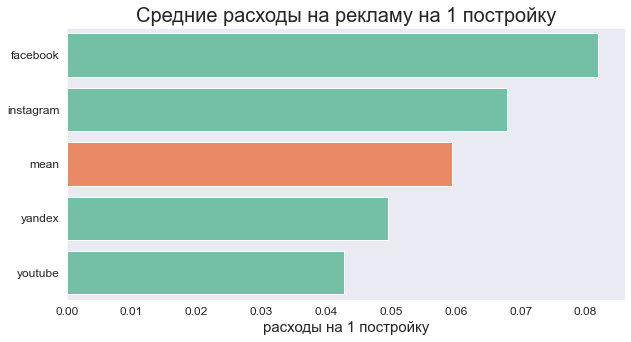

In [92]:
plt.figure(figsize=(10, 5))
data=cost_per_source.sort_values(by='cost_per_building', ascending=False)
palette2 = ['coral' if x == 'mean' else 'mediumaquamarine' for x in data['source']]
sns.barplot(y='source', x='cost_per_building', data=data, palette=palette2)
plt.xlabel('расходы на 1 постройку', fontsize=15)
plt.ylabel('')
#plt.title('Средние расходы на рекламу на 1 постройку по рекламным источникам', fontsize=20)
plt.title('Средние расходы на рекламу на 1 постройку', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Предварительный вывод:
Рекламные расходы различаются в зависимости от источника привлечения:
1) по средним расходам на 1 пользователя (***CAC***):
 - ***самым дешевым источником является Youtube (0.40 единиц)***
 - ***вторым по дешевизне является Yandex (0.46 единиц)***
 - самым дорогим - Facebook (0,79 единиц)
 
2) ***по средним расходам на 1 постройку***:
- ***лучше всех Youtube (0,04 единиц) и Yandex (0,05 единиц)***
- при планируемой монетизации на уровне 0,07 единиц за событие просмотра постройки не окупятся в среднем только пользователи, пришедшие из Facebook

### Вывод:

1) Рекламные источники практически никак **не влияют на игровую активность пользователей**:
- Среднее количество событий по разным источникам практически идентично и равно примерно ***10 событиям на игрока***
- Среднее количество построек на 1 игрока колеблется от 9,3 до 9,6 в зависимости от источника при средней в 9,4 по всем источникам (в разрезе игровых стратегий по этому показателю также нет существенных различий)
- ***Доля событий построек по каждому источнику - 94%, как и по всем пользователям в целом***
- Среднее время в игре, как и по всем пользователям в целом составляет ***порядка 12 дней***, среднее время на завершение уровня не зависит от источника (в том числе и в разрезе игровых стратегий)

2) Источники привлечения различаются между собой по:
 - количеству привлеченных пользователей:***самым крупным источником является Yandex***, из которого в приложение пришли порядка 35% пользователей, около 25% - из instagram (25%), по 20% - из Facebook и Youtube
 - рекламным расходам:
   - по CAC самым дешевым источником является Youtube (0.40 единиц), ***вторым по дешевизне является Yandex (0.46 единиц)*** и самым дорогим - Facebook (0,79 единиц)
   - ***по средним расходам на 1 постройку***: ***лучше всех Youtube (0,04 единиц) и Yandex (0,05 единиц)***; при планируемой монетизации на уровне 0,07 единиц за событие просмотра постройки не окупятся в среднем только пользователи, пришедшие из Facebook
   
3) Исходя из сочетания факторов, по которым есть различия, (количества привлеченных пользователей и удельных показателей рекламных расходов) ***наиболее интересными источниками привлечения являются Yandex и Youtube***; при проверке гипотез будем сравнивать именно эти 2 источника между собой

## Проверка статистических гипотез

### Проверка гипотезы о влиянии способа прохождения игры на среднее время завершения уровня

1) Формулируем гипотезы:
- **Н0**: Среднее время завершения первого уровня не различается в зависимости способа его прохождения (через реализацию проекта, через победу над первым игроком)
- **Н1**: Среднее время завершения первого уровня различается в зависимости способа его прохождения (через реализацию проекта, через победу над первым игроком)

2) Kритический уровень статистической значимости **alpha примем на уровне 0,05**

In [93]:
# сгруппируем пользователей по дате и игровой стратегией

time7 = (actions[actions['level_done'] != 'stuck']
    .groupby(['user_id', 'level_done'])
    .agg({'day': ['min', 'max']})
    .reset_index()
)

time7.columns = ['user_id', 'level_done', 'start', 'end']
time7['time'] = (time7['end'] - time7['start']).dt.days + 1

In [94]:
# разделим пользователей на 2 выборки: pve и pvp

sample_1 = time7[time7['level_done'] == 'pve']['time']

sample_2 = time7[time7['level_done'] == 'pvp']['time']

print(len(sample_1))
len(sample_2)

1866


3951

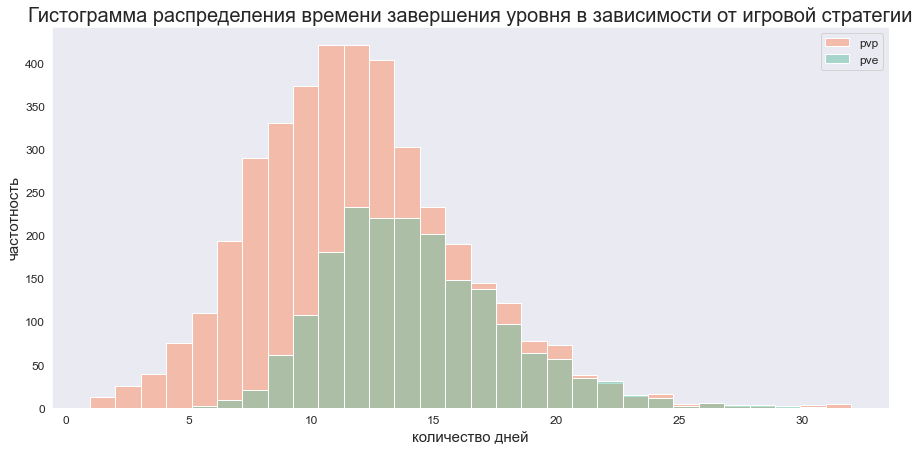

In [95]:
plt.figure(figsize=(15, 7))
hue_order = sorted(time7['level_done'].unique())
sns.histplot(x='time', data=time6[time6['level_done'] != 'stuck'], hue='level_done', hue_order=hue_order, bins=30)
plt.xlabel('количество дней', fontsize=15)
plt.ylabel('частотность', fontsize=15)
plt.title('Гистограмма распределения времени завершения уровня в зависимости от игровой стратегии', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['pvp', 'pve'], fontsize=12)
plt.show()

- Распределения похожи на нормальные, но для t-теста, который будем исспользовать для проверки гипотез это не имеет значение, т.к. для него важно, чтобы средние значения, а не сами значения были распределены нормально, а это условие выполняется для всех типов распределений
- По графикам между выборками видны различия, проверим это с помощью t-testa

In [96]:
# проведем тест Левена для проверки равенства дисперсий выборок

def levenes(sample_1, sample_2):
    alpha = .05

    statistic, p_value = levene(sample_1, sample_2, center = 'mean')

    print('Статистика Левена:', statistic)
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [97]:
# проводим тест Левена

levenes(sample_1, sample_2)

Статистика Левена: 33.30684670424538
p-значение:  8.276790744612446e-09
Отвергаем нулевую гипотезу


Дисперсии выборок имеют значимые различия, соответственно, в t-testе нужно указать параметр equal_var=False

In [98]:
# функция для проверки нулевой гипотезы t-тестом 

def stat(sample_1, sample_2):
    alpha = .05

    results = st.ttest_ind(
        sample_1, 
        sample_2,
        equal_var=False)

    print('p-значение: ', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [99]:
# проверяем нулевую гипотезу

stat(sample_1, sample_2)

p-значение:  6.570466755643636e-105
Отвергаем нулевую гипотезу


#### Предварительный вывод:
- Поскольку нулевая гипотеза не подтвердилась, ***среднее время завершения игры отличается в зависимости от способа его прохождения***

### Проверка гипотезы о влиянии рекламного источника, из которого пришел пользователь, на среднее время завершения уровня

Сравним среднее время завершения уровня игроками, пришедшими из Facebook (самый дорогой источник), с показателем по всем остальным источникам

1) Формулируем гипотезы:
- **Н0**: Среднее время завершения первого уровня не различается в зависимости от рекламного источника, из которого пришел пользователь (Facebook против остальных)
- **Н1**: Среднее время завершения первого уровня различается в зависимости от рекламного источника, из которого пришел пользователь (Facebook против остальных)

2) Kритический уровень статистической значимости **alpha примем на уровне 0,05**

In [100]:
# сгруппируем пользователей по дате и рекламному источнику

time8 = (actions[actions['level_done'] != 'stuck']
    .groupby(['user_id', 'source'])
    .agg({'day': ['min', 'max']})
    .reset_index()
)

time8.columns = ['user_id', 'source', 'start', 'end']
time8['time'] = (time8['end'] - time8['start']).dt.days + 1

In [101]:
# заменим имена всех источников, кроме facebook на others

wrong_names = ['instagram', 'yandex', 'youtube']
correct_name = 'others'

for wrong_name in wrong_names: 
    time8['source'] = time8['source'].replace(wrong_name, correct_name)

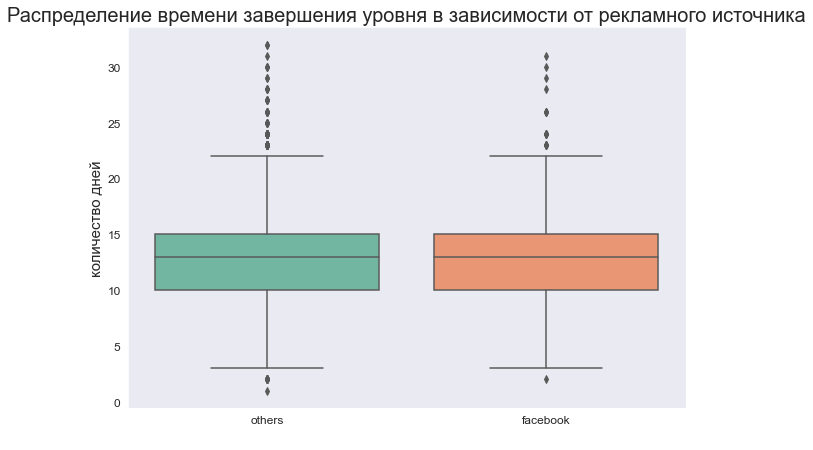

In [102]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='source', y='time', data=time8)
plt.xlabel(' ', fontsize=15)
plt.ylabel('количество дней', fontsize=15)
plt.title('Распределение времени завершения уровня в зависимости от рекламного источника', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Судя по диаграммам размаха среднее время завершения уровня в зависимости от источника не различается
- Проверим  это также с помощью t-testa

In [103]:
sample_1 = time8[time8['source'] == 'facebook']['time']
sample_2 = time8[time8['source'] != 'facebook']['time']

print(len(sample_1))
len(sample_2)

1150


4667

In [104]:
levenes(sample_1, sample_2)

Статистика Левена: 0.0036259508684804783
p-значение:  0.9519857763531177
Не получилось отвергнуть нулевую гипотезу


Дисперсии выборок не имеют значимые различия, соответственно, в t-testе можно не указывать параметр equal_var (по умолчанию равен True)

In [105]:
def stat2(sample_1, sample_2):
    alpha = .05

    results = st.ttest_ind(
        sample_1, 
        sample_2)

    print('p-значение: ', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [106]:
stat2(sample_1, sample_2)

p-значение:  0.898683490132516
Не получилось отвергнуть нулевую гипотезу


#### Предварительный вывод:
- Поскольку нулевая гипотеза подтвердилась, ***среднее время завершения игры не отличается в зависимости от рекламного источника: Facebook или остальные источники***

### Проверка гипотезы о влиянии рекламного источника на среднее количество построек на 1 пользователя

Также, как и в предыдущей гипотезе, сравним значение  показателя (здесь среднее количество построек на 1 пользователя) по игрокам, пришедшими из Facebook, с показателем по всем остальным источникам

1) Формулируем гипотезы:

- **Н0**: Среднее  количество построек на 1 пользователя не различается в зависимости от рекламного источника, из которого пришел пользователь (Facebook против остальных)
- **Н1**: Среднее  количество построек на 1 пользователя различается в зависимости от рекламного источника, из которого пришел пользователь (Facebook против остальных)

2) Kритический уровень статистической значимости **alpha примем на уровне 0,05**

In [107]:
# посчитаем количество построек на 1 пользователя в разрезе рекламных источников

buildings_per_sources3 = (actions[actions['event'] == 'building']
    .groupby(['day', 'source'])
    .agg({'event': 'count', 'user_id': 'nunique'})
    .reset_index()
)

buildings_per_sources3.columns = ['day', 'source', 'events', 'users']
buildings_per_sources3['buildings_per_user'] = buildings_per_sources3['events'] / buildings_per_sources3['users']

In [108]:
for wrong_name in wrong_names: 
    buildings_per_sources3['source'] = buildings_per_sources3['source'].replace(wrong_name, correct_name)

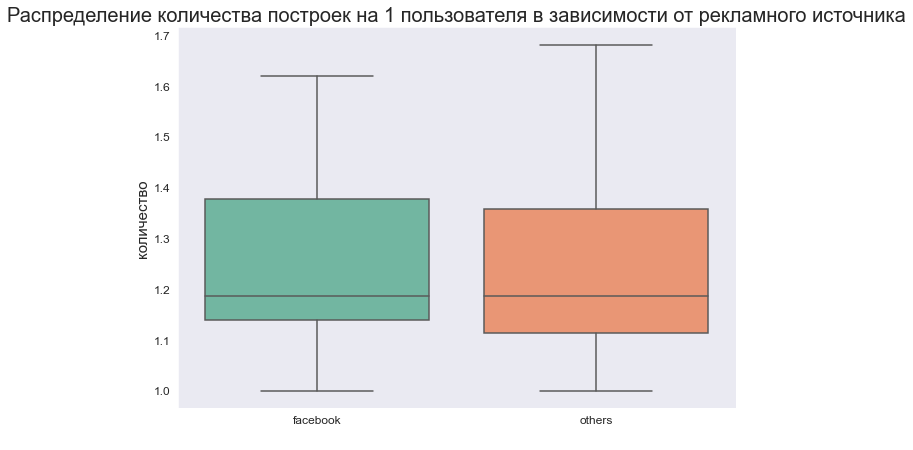

In [109]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='source', y='buildings_per_user', data=buildings_per_sources3)
plt.xlabel(' ', fontsize=15)
plt.ylabel('количество', fontsize=15)
plt.title('Распределение количества построек на 1 пользователя в зависимости от рекламного источника', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Судя по диаграммам размаха среднее количество построек на 1 пользователя в зависимости от источника практически не отличается
- Проверим  это также с помощью t-testa

In [110]:
sample_1 = buildings_per_sources3[buildings_per_sources3['source'] == 'facebook']['buildings_per_user']
sample_2 = buildings_per_sources3[buildings_per_sources3['source'] != 'facebook']['buildings_per_user']

print(len(sample_1))
len(sample_2)

32


95

Размеры выборок малы, но минимально допустимы для проведения t-testa

In [111]:
levenes(sample_1, sample_2)

Статистика Левена: 0.031014943257621917
p-значение:  0.8604920489185287
Не получилось отвергнуть нулевую гипотезу


Дисперсии выборок не имеют значимые различия, соответственно, в t-testе можно не указывать параметр equal_var, используем функцию stat2 

In [112]:
stat2(sample_1, sample_2)

p-значение:  0.6520008254821905
Не получилось отвергнуть нулевую гипотезу


#### Предварительный вывод:
Поскольку нулевая гипотеза подтвердилась, ***среднее количество построек на 1 пользователя не отличается в зависимости от рекламного источника: Facebook или остальные источники***

### Вывод:
1) Нулевая гипотеза не подтвердилась: ***среднее время завершения игры отличается в зависимости от способа его прохождения***

2) Нулевая гипотеза подтвердилась: ***среднее время завершения игры не отличается в зависимости от рекламного источника: Facebook или остальные источники***

3) Нулевая гипотеза подтвердилась: ***среднее количество построек на 1 пользователя не отличается в зависимости от рекламного источника: Facebook или остальные источники***

4) Facebook является самым дорогим источником привлечения, и при этом его пользователи не отличается от пользователей остальных  источников по части игровой активности; т.о. ***Facebook является самым неэффективным рекламным каналом***

## Общий вывод

**1. Исследовательский анализ данных**:

**1) Основные характеристики игровой активности пользователей мобильного приложения**:

 - порядка 136 тысяч логов
 - количество уникальных пользователей: всего ***13 576***, в день -  2885 (DAU), в неделю - 6120 (MAU); sticky factor = 47%, т.е. в среднем ***почти половина пользователей остается в игре по прошествии недели - это хороший показатель вовлеченности пользователей***
 - наиболее часто встречающееся событие в игре: ***building (постройка объекта) - 94%***
 - наиболее часто встречающаяся постройка: spaceport (космопорт) - 46%
 - среднее количество событий на 1 пользователя: за весь период - ***10 событий***, в день - 1,3 события
 - среднее время нахождения в игре/завершения уровня: порядка 12 дней
 - выделяются 2 стратегии завершения первого уровня: 
    - доли по количеству пользователей: ***29% - PVP***, ***14% - PVE***
    - количество событий на 1 пользователя: ***PVE - 15 событий***, ***PVP - 10 событий***
    - время завершения уровня: ***PVE - 14 дней***, ***PVP 12 дней***

**2)** С точки зрения количества событий на пользователя и планов по дальнейшей монетизации ***самыми перспективными выглядят пользователи стратегии PVE***, которые проводят в игре на 2 дня больше, чем пользователи PVP, и на которых приходится по сравнению с PVP в среднем на 5 событий и на 4 постройки больше (последние являются событиями планируемой монетизации)
 
**3) Основные данные по каналам привлечения и маркетинговым расходам:**
 - 4 рекламных канала: Facebook, Yandex, Youtube, Instagram
 - самым популярным рекламным источником является ***Yandex - почти 5 тысяч пользователей***
 - суммарные затраты составляют 7604 единицы
 - ***CAC - 0,56 единиц***
 - ***расходы на 1 событие просмотра страницы постройки - 0,06 единиц*** (точка безубыточности)

**4)** При стоимости монетизации 1 просмотра события постройки на уровне ***0,07 единиц, которую предполагает заказчик, маркетинговые затраты отобьются с некоторой  прибылью (порядка 1280 единиц)*** при условии сохранения схожей пользовательской активности
______________________________________________________________________________________________________________________________
**2. Анализ влияния источника перехода в игру на поведение пользователя**:

**1) Рекламные источники практически никак не влияют на игровую активность пользователей**:
- среднее количество событий по разным источникам равно примерно ***10 событиям на игрока***
- среднее количество построек на 1 игрока колеблется от 9,3 до 9,6 в зависимости от источника при средней в 9,4
- ***Доля событий построек по каждому источнику - 94%, как и по всем пользователям в целом***
- ***среднее время нахождения в игре***, как и по всем пользователям в целом составляет ***порядка 12 дней***

**2) Источники привлечения различаются между собой по**:
 - количеству привлеченных пользователей:***самым крупным источником является Yandex***, из которого в приложение пришли порядка 35% пользователей, около 25% - из instagram (25%), по 20% - из Facebook и Youtube
 - рекламным расходам:
   - по CAC самым дешевым источником является Youtube (0.40 единиц), ***вторым по дешевизне является Yandex (0.46 единиц)*** и самым дорогим - Facebook (0,79 единиц)
   - ***по средним расходам на 1 постройку***: ***лучше всех Youtube (0,04 единиц) и Yandex (0,05 единиц)***; при планируемой монетизации на уровне 0,07 единиц за событие просмотра постройки не окупятся в среднем только пользователи, пришедшие из Facebook
   
**3)** Исходя из сочетания факторов, по которым есть различия, (количества привлеченных пользователей и удельных показателей рекламных расходов) ***наиболее интересными источниками привлечения являются Yandex и Youtube***
______________________________________________________________________________________________________________________________
**3. Результаты проверки гипотез**:

**1)** Среднее время завершения игры отличается в зависимости от способа его прохождения

**2)** Среднее время завершения игры не отличается в зависимости от рекламного источника: Facebook или остальные источники

**4)** Среднее количество построек на 1 пользователя не отличается в зависимости от рекламного источника: Facebook или остальные источники

**5)** Facebook является самым дорогим источником привлечения, и при этом его пользователи не отличается от пользователей остальных  источников по части игровой активности; т.о. ***Facebook является самым неэффективным рекламным каналом***
______________________________________________________________________________________________________________________________
**4. Рекомендации для заказчика**:

**1)перераспределить маркетинговые расходы в пользу более окупаемых источников**: от дорогого и неэффективного с точки зрения игровой активности Facebook к Yandex и Youtube: особенно в пользу второго источника, поскольку его доля в привлечении пользователей меньше (20% против 35% у Yandex)  и есть потенциал ее роста

**2) разработать стратегию стимулирования игроков к прохождению игры через стратегию PVE**, которая является наиболее привлекательной с точки зрения планируемой монетизации за счет большего количества построек (потенциально монетизируемое событие) и большего времени нахождения в игре

**3) при реализации второй рекомендации не забывать про баланс между стратегиями PVE и PVP**, чтобы игроки, привыкшие к "быстрой победе" не потеряли интерес к игре и не ушли, поскольку на следующих этапах монетизации они также могут стать ее объектами